In [1]:
import os
import re
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report
import ipyplot

In [3]:
data = []
sub = []
with open("../data/txt/CK+_10-fold_sample_IDascendorder_step10.txt", "r") as f:
    for line in f:
        if re.match(r"S", line):
            sub.append(line.strip())
        else:
            data.append(sub)
            sub = []
    data.append(sub)
data = data[1:]


fold1-10

In [4]:
data

[['S130/007 Angry',
  'S501/001 Angry',
  'S147/002 Contempt',
  'S005/001 Disgust',
  'S035/005 Disgust',
  'S054/004 Disgust',
  'S074/004 Disgust',
  'S106/004 Disgust',
  'S116/006 Disgust',
  'S130/012 Disgust',
  'S054/002 Fear',
  'S074/001 Fear',
  'S084/002 Fear',
  'S501/004 Fear',
  'S035/006 Happy',
  'S064/003 Happy',
  'S074/005 Happy',
  'S094/004 Happy',
  'S106/006 Happy',
  'S116/007 Happy',
  'S130/013 Happy',
  'S064/004 Sad',
  'S106/002 Sad',
  'S130/009 Sad',
  'S501/006 Sad',
  'S035/001 Surprise',
  'S054/003 Surprise',
  'S064/001 Surprise',
  'S074/002 Surprise',
  'S084/001 Surprise',
  'S094/001 Surprise',
  'S116/001 Surprise',
  'S130/001 Surprise'],
 ['S010/004 Angry',
  'S037/003 Angry',
  'S055/004 Angry',
  'S075/008 Angry',
  'S117/006 Angry',
  'S502/001 Angry',
  'S148/002 Contempt',
  'S502/002 Contempt',
  'S055/003 Disgust',
  'S065/005 Disgust',
  'S075/005 Disgust',
  'S085/004 Disgust',
  'S095/006 Disgust',
  'S107/005 Disgust',
  'S131/010 

In [5]:
ck = {0: 'Happy', 1: 'Angry', 2: 'Disgust', 3: 'Fear', 4: 'Sad', 5: 'Contempt', 6: 'Surprise'}
listvalue = list(ck.values())
listvalue

['Happy', 'Angry', 'Disgust', 'Fear', 'Sad', 'Contempt', 'Surprise']

function report pred

In [6]:
def report_pred(evaldest, evalfile, datafold, listvalue):
    label_fold = []
    pred_fold = []
    with open(evaldest + evalfile, "r") as f:
        for line in f:
            if re.match(r"L", line):
                temp = line.strip().split(", ")
                label_fold.append(temp[0][-1])
                pred_fold.append(temp[1][-1])
    for i in range(len(datafold)):
        label = int(label_fold[i])
        pred = int(pred_fold[i])
        tf = label == pred
        if not tf:
            print(f'{datafold[i]}, Label: {label} ({listvalue[label]}), Pred: {pred} ({listvalue[pred]}), Correct: {tf}')
            name = datafold[i].split()[0]
            dir_path = "../data/face/ck_face/"+name # Get the path to the directory
            image_files = os.listdir(dir_path)  # Get a list of all image files in the directory
            image_files = [os.path.join(dir_path, f) for f in image_files]
            ipyplot.plot_images(image_files, img_width=100)
    return label_fold, pred_fold
        

# Fold 1

## data

In [7]:
datafold1 = data[0]
datafold1

['S130/007 Angry',
 'S501/001 Angry',
 'S147/002 Contempt',
 'S005/001 Disgust',
 'S035/005 Disgust',
 'S054/004 Disgust',
 'S074/004 Disgust',
 'S106/004 Disgust',
 'S116/006 Disgust',
 'S130/012 Disgust',
 'S054/002 Fear',
 'S074/001 Fear',
 'S084/002 Fear',
 'S501/004 Fear',
 'S035/006 Happy',
 'S064/003 Happy',
 'S074/005 Happy',
 'S094/004 Happy',
 'S106/006 Happy',
 'S116/007 Happy',
 'S130/013 Happy',
 'S064/004 Sad',
 'S106/002 Sad',
 'S130/009 Sad',
 'S501/006 Sad',
 'S035/001 Surprise',
 'S054/003 Surprise',
 'S064/001 Surprise',
 'S074/002 Surprise',
 'S084/001 Surprise',
 'S094/001 Surprise',
 'S116/001 Surprise',
 'S130/001 Surprise']

In [9]:
dest1 = "../log/lossfold1/"
losslist1 = []
for file in os.listdir(dest1):
    temp = []
    if file.startswith("cktrain_loss") and file.endswith(".txt"):
        losslist1.append(file)


losslist

In [10]:
losslist1

['cktrain_loss_fold1-1fan_ckplus_date_25-Feb-2024-14-31-40.txt',
 'cktrain_loss_fold1-2fan_ckplus_date_25-Feb-2024-16-02-40.txt',
 'cktrain_loss_fold1-3fan_ckplus_date_25-Feb-2024-17-36-31.txt']

In [12]:
evaldestfold1 = "../log/lossfold1/eval/"
evallist_fold1 = []
for file in os.listdir(evaldestfold1):
    evallist_fold1.append(file)

evallist

In [13]:
evallist_fold1

['1-1evalfan_ckplus_date_26-Feb-2024-04-02-16.txt',
 '1-2evalfan_ckplus_date_26-Feb-2024-04-06-03.txt',
 '1-3evalfan_ckplus_date_26-Feb-2024-04-07-41.txt']

## 1-1

In [14]:
evalfile1_1 = evallist_fold1[0]

In [15]:
fold_1_1 = losslist1[0]
epochs1_1 = []
train_loss1_1 = []
val_loss1_1 = []
with open(dest1 + fold_1_1, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs1_1.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss1_1.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss1_1.append(float(temp[0]))
print(epochs1_1)
print(train_loss1_1)
print(val_loss1_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4606, 0.0643, 0.0233, 0.0196, 0.0282, 0.0383, 0.0174, 0.0084, 0.001, 0.0004, 0.0003, 0.0001, 0.0017, 0.0041, 0.0091, 0.0099, 0.0101, 0.0211, 0.015, 0.0131, 0.003, 0.0058, 0.0055, 0.0089, 0.0373, 0.0029, 0.0006, 0.0029, 0.0017, 0.0021, 0.0004, 0.0016, 0.0004, 0.0004, 0.0003, 0.0003, 0.0006, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0003, 0.0001, 0.0022, 0.0002, 0.0002, 0.0002, 0.0002]
[39.9287, 42.563, 259.0895, 37.7843, 1001.6343, 107.0408, 256.7259, 48.6072, 55.5541, 62.6001, 69.4003, 55.4776, 24.7448, 66.8622, 29.2672, 54.0211, 14.0202, 15.7445, 76.4104, 13.4369, 41.0376, 50.8602, 15.19, 48.0234, 63.5125, 90.0263, 48.0173, 10.266, 14.5717, 34.2025, 49.5763, 25.183, 46

### prediction report

In [16]:
label_1_1, pred_1_1 = report_pred(evaldestfold1, evalfile1_1, datafold1, listvalue)

S064/004 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False


S130/009 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False


### classification report

In [17]:
print("Fold1-1")
print(classification_report(label_1_1, pred_1_1, target_names=listvalue))

Fold1-1
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         7
       Angry       0.50      1.00      0.67         2
     Disgust       1.00      1.00      1.00         7
        Fear       1.00      1.00      1.00         4
         Sad       1.00      0.50      0.67         4
    Contempt       1.00      1.00      1.00         1
    Surprise       1.00      1.00      1.00         8

    accuracy                           0.94        33
   macro avg       0.93      0.93      0.90        33
weighted avg       0.97      0.94      0.94        33



## 1-2

In [18]:
evalfile1_2 = evallist_fold1[1]
evalfile1_2

'1-2evalfan_ckplus_date_26-Feb-2024-04-06-03.txt'

In [19]:
losslist1[1]

'cktrain_loss_fold1-2fan_ckplus_date_25-Feb-2024-16-02-40.txt'

In [20]:
fold_1_2 = losslist1[1]
epochs1_2 = []
train_loss1_2 = []
val_loss1_2 = []
with open(dest1 + fold_1_2, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs1_2.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss1_2.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss1_2.append(float(temp[0]))
print(epochs1_2)
print(train_loss1_2)
print(val_loss1_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4687, 0.0836, 0.0416, 0.0193, 0.0213, 0.0161, 0.0073, 0.0011, 0.0138, 0.0043, 0.0118, 0.0061, 0.0132, 0.0012, 0.0002, 0.0008, 0.0066, 0.0018, 0.0006, 0.0003, 0.0002, 0.0001, 0.0001, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
[41.0272, 57.1271, 177.421, 36.5722, 229.61, 72.2917, 292.691, 221.4581, 46.6955, 36.2167, 37.9902, 49.1642, 31.5688, 125.2156, 95.9149, 65.7755, 452.6973, 278.9622, 115.7521, 285.0726, 140.6351, 211.9108, 77.5646, 116.9599, 83.2063, 61.6663, 44.0725, 36.1597, 43.3934, 42.7086, 85.6387, 

### prediction report

In [21]:
label_1_2, pred_1_2 = report_pred(evaldestfold1, evalfile1_2, datafold1, listvalue)

S147/002 Contempt, Label: 5 (Contempt), Pred: 3 (Fear), Correct: False


S064/004 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False


S130/009 Sad, Label: 4 (Sad), Pred: 2 (Disgust), Correct: False


### classification report

In [22]:
print("Fold1-2")
print(classification_report(label_1_2, pred_1_2, target_names=listvalue))

Fold1-2
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         7
       Angry       0.67      1.00      0.80         2
     Disgust       0.88      1.00      0.93         7
        Fear       0.80      1.00      0.89         4
         Sad       1.00      0.50      0.67         4
    Contempt       0.00      0.00      0.00         1
    Surprise       1.00      1.00      1.00         8

    accuracy                           0.91        33
   macro avg       0.76      0.79      0.76        33
weighted avg       0.90      0.91      0.89        33



c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1-3

In [23]:
evalfile1_3 = evallist_fold1[2]
evalfile1_3

'1-3evalfan_ckplus_date_26-Feb-2024-04-07-41.txt'

In [24]:
losslist1[2]

'cktrain_loss_fold1-3fan_ckplus_date_25-Feb-2024-17-36-31.txt'

In [25]:
fold_1_3 = losslist1[2]
epochs1_3 = []
train_loss1_3 = []
val_loss1_3 = []
with open(dest1 + fold_1_3, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs1_3.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss1_3.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss1_3.append(float(temp[0]))
print(epochs1_3)
print(train_loss1_3)
print(val_loss1_3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4425, 0.082, 0.0329, 0.027, 0.0172, 0.0231, 0.0186, 0.0016, 0.0014, 0.0006, 0.0008, 0.0026, 0.0004, 0.0003, 0.0008, 0.0031, 0.0036, 0.0156, 0.0152, 0.0063, 0.0004, 0.0018, 0.0004, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0006, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
[11.0393, 12.4249, 14.0351, 20.9514, 11.5979, 42.035, 6.1677, 18.7848, 30.194, 16.6599, 21.0128, 40.431, 26.2893, 37.5692, 28.8265, 26.4234, 34.8903, 25.0189, 6.9365, 6.1551, 9.7158, 13.3409, 11.7369, 12.7104, 13.6216, 13.6938, 14.552, 11.8678, 12.6502, 12.4441, 12.992, 10.2978, 11.477, 12

### prediction report

In [26]:
label_1_3, pred_1_3 = report_pred(evaldestfold1, evalfile1_3, datafold1, listvalue)

S064/004 Sad, Label: 4 (Sad), Pred: 2 (Disgust), Correct: False


S130/009 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False


### classification report

In [27]:
print("Fold1-3")
print(classification_report(label_1_3, pred_1_3, target_names=listvalue))

Fold1-3
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         7
       Angry       0.67      1.00      0.80         2
     Disgust       0.88      1.00      0.93         7
        Fear       1.00      1.00      1.00         4
         Sad       1.00      0.50      0.67         4
    Contempt       1.00      1.00      1.00         1
    Surprise       1.00      1.00      1.00         8

    accuracy                           0.94        33
   macro avg       0.93      0.93      0.91        33
weighted avg       0.95      0.94      0.93        33



## loss

Fold1-1


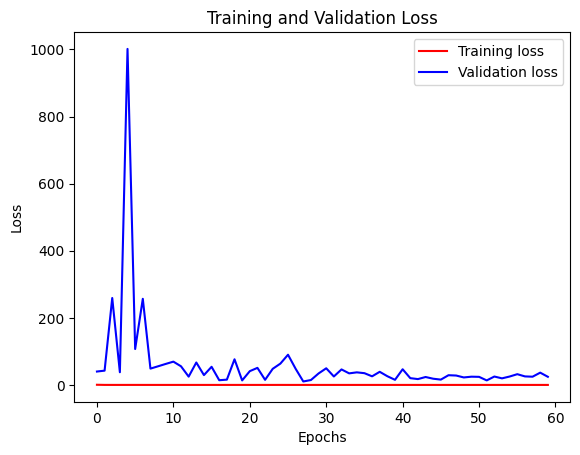

Fold1-2


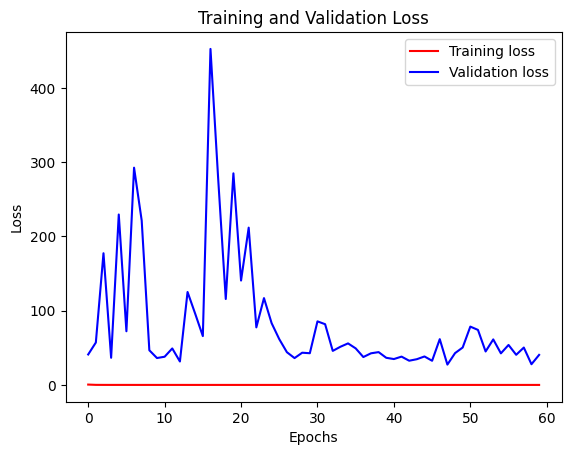

Fold1-3


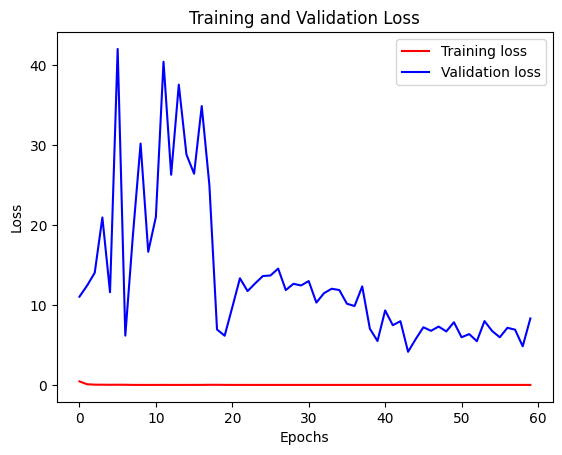

In [28]:
print("Fold1-1")
plt.plot(epochs1_1, train_loss1_1, 'r', label='Training loss')
plt.plot(epochs1_1, val_loss1_1, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold1-2")
plt.plot(epochs1_2, train_loss1_2, 'r', label='Training loss')
plt.plot(epochs1_2, val_loss1_2, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold1-3")
plt.plot(epochs1_3, train_loss1_3, 'r', label='Training loss')
plt.plot(epochs1_3, val_loss1_3, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Fold 2

## data

In [29]:
datafold2 = data[1]
datafold2

['S010/004 Angry',
 'S037/003 Angry',
 'S055/004 Angry',
 'S075/008 Angry',
 'S117/006 Angry',
 'S502/001 Angry',
 'S148/002 Contempt',
 'S502/002 Contempt',
 'S055/003 Disgust',
 'S065/005 Disgust',
 'S075/005 Disgust',
 'S085/004 Disgust',
 'S095/006 Disgust',
 'S107/005 Disgust',
 'S131/010 Disgust',
 'S055/006 Fear',
 'S065/002 Fear',
 'S117/003 Fear',
 'S502/004 Fear',
 'S010/006 Happy',
 'S037/006 Happy',
 'S055/005 Happy',
 'S065/004 Happy',
 'S075/006 Happy',
 'S085/002 Happy',
 'S095/007 Happy',
 'S131/006 Happy',
 'S095/010 Sad',
 'S131/003 Sad',
 'S010/002 Surprise',
 'S037/001 Surprise',
 'S055/001 Surprise',
 'S065/003 Surprise',
 'S075/002 Surprise',
 'S085/003 Surprise',
 'S095/001 Surprise',
 'S107/001 Surprise',
 'S117/001 Surprise',
 'S131/001 Surprise']

In [30]:
dest2 = "../log/lossfold2/"
losslist2 = []
for file in os.listdir(dest2):
    temp = []
    if file.startswith("cktrain_loss") and file.endswith(".txt"):
        losslist2.append(file)


lostlist

In [31]:
losslist2

['cktrain_loss_fold2-1fan_ckplus_date_25-Feb-2024-09-36-51.txt',
 'cktrain_loss_fold2-2fan_ckplus_date_25-Feb-2024-11-16-21.txt',
 'cktrain_loss_fold2-3fan_ckplus_date_25-Feb-2024-12-55-02.txt']

In [32]:
evaldestfold2 = "../log/lossfold2/eval/"
evallist_fold2 = []
for file in os.listdir(evaldestfold2):
    evallist_fold2.append(file)

evallist

In [33]:
evallist_fold2

['2-1evalfan_ckplus_date_26-Feb-2024-04-51-56.txt',
 '2-2evalfan_ckplus_date_26-Feb-2024-04-53-02.txt',
 '2-3evalfan_ckplus_date_26-Feb-2024-04-53-58.txt']

## 2-1

In [34]:
evalfile2_1 = evallist_fold2[0]

In [35]:
fold_2_1 = losslist2[0]
epochs2_1 = []
train_loss2_1 = []
val_loss2_1 = []
with open(dest2 + fold_2_1, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs2_1.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss2_1.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss2_1.append(float(temp[0]))
print(epochs2_1)
print(train_loss2_1)
print(val_loss2_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4216, 0.0614, 0.0663, 0.0434, 0.0205, 0.0282, 0.0168, 0.0032, 0.0007, 0.0029, 0.0003, 0.0002, 0.0005, 0.0014, 0.0134, 0.0027, 0.0004, 0.0003, 0.0002, 0.0083, 0.0009, 0.0003, 0.0003, 0.0002, 0.0003, 0.0002, 0.0001, 0.0003, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0003, 0.0001, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002]
[25.1432, 52.1538, 3057.6531, 107.9262, 14.7295, 27.2592, 19.0911, 98.1717, 43.8522, 138.3171, 121.504, 51.6302, 35.0472, 52.8127, 42.6976, 9.8805, 11.9454, 1.8306, 7.9346, 29.0169, 19.9104, 8.248, 10.6002, 8.2119, 10.9782, 2.3536, 5.3923, 16.463, 15.1465, 7.6993, 12.3812, 9.8206, 9.1304

### prediction report

In [36]:
label_2_1, pred_2_1 = report_pred(evaldestfold2, evalfile2_1, datafold2, listvalue)

S131/010 Disgust, Label: 2 (Disgust), Pred: 1 (Angry), Correct: False


### classification report

In [37]:
print("Fold2-1")
print(classification_report(label_2_1, pred_2_1, target_names=listvalue))

Fold2-1
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         8
       Angry       0.86      1.00      0.92         6
     Disgust       1.00      0.86      0.92         7
        Fear       1.00      1.00      1.00         4
         Sad       1.00      1.00      1.00         2
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00        10

    accuracy                           0.97        39
   macro avg       0.98      0.98      0.98        39
weighted avg       0.98      0.97      0.97        39



## 2-2

In [38]:
evalfile2_2 = evallist_fold2[1]
evalfile2_2

'2-2evalfan_ckplus_date_26-Feb-2024-04-53-02.txt'

In [39]:
losslist2[1]

'cktrain_loss_fold2-2fan_ckplus_date_25-Feb-2024-11-16-21.txt'

In [40]:
fold_2_2 = losslist2[1]
epochs2_2 = []
train_loss2_2 = []
val_loss2_2 = []
with open(dest2 + fold_2_2, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs2_2.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss2_2.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss2_2.append(float(temp[0]))
print(epochs2_2)
print(train_loss2_2)
print(val_loss2_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4692, 0.064, 0.0385, 0.0042, 0.0015, 0.0221, 0.0027, 0.0003, 0.0002, 0.0002, 0.0003, 0.0001, 0.0001, 0.0002, 0.0009, 0.0049, 0.0062, 0.0144, 0.0052, 0.0004, 0.0002, 0.0002, 0.0002, 0.0002, 0.003, 0.0242, 0.002, 0.0003, 0.0002, 0.0002, 0.0003, 0.0001, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0004, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0009, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001]
[2.7493, 56.0628, 766.5536, 3347.0039, 293.3301, 0.3945, 1.9746, 1.459, 1.2925, 2.3809, 4.1087, 2.6197, 4.557, 1.5024, 0.0, 4.9954, 12.8237, 6.9992, 6.9951, 3.9152, 5.7283, 8.6303, 5.9983, 5.1957, 4.4979, 0.4013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

### prediction report

In [41]:
label_2_2, pred_2_2 = report_pred(evaldestfold2, evalfile2_2, datafold2, listvalue)

### classification report

In [42]:
print("Fold2-2")
print(classification_report(label_2_2, pred_2_2, target_names=listvalue))

Fold2-2
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         8
       Angry       1.00      1.00      1.00         6
     Disgust       1.00      1.00      1.00         7
        Fear       1.00      1.00      1.00         4
         Sad       1.00      1.00      1.00         2
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00        10

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



## 2-3

In [43]:
evalfile2_3 = evallist_fold2[2]
evalfile2_3

'2-3evalfan_ckplus_date_26-Feb-2024-04-53-58.txt'

In [44]:
losslist2[2]

'cktrain_loss_fold2-3fan_ckplus_date_25-Feb-2024-12-55-02.txt'

In [45]:
fold_2_3 = losslist2[2]
epochs2_3 = []
train_loss2_3 = []
val_loss2_3 = []
with open(dest2 + fold_2_3, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs2_3.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss2_3.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss2_3.append(float(temp[0]))
print(epochs2_3)
print(train_loss2_3)
print(val_loss2_3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4797, 0.089, 0.0179, 0.0174, 0.0061, 0.0012, 0.0007, 0.0036, 0.0041, 0.0053, 0.0003, 0.0003, 0.0028, 0.0013, 0.005, 0.0038, 0.0242, 0.0123, 0.0026, 0.0003, 0.0003, 0.0003, 0.0002, 0.0003, 0.0018, 0.0038, 0.0065, 0.0005, 0.0003, 0.001, 0.0003, 0.0002, 0.0004, 0.0002, 0.0002, 0.0003, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
[17.3247, 5792.8945, 7437.2451, 5211.6079, 10639.0234, 7555.73, 5471.8667, 2121.8079, 31.8098, 0.0, 92.4616, 72.7501, 38.048, 338.8694, 236.6143, 1951.7646, 0.0, 25.104, 6.6077, 2.1803, 4.473, 0.9868, 2.1496, 13.5586, 47.5696, 37.3689, 84.7369, 62.48, 63.4991, 35.8915, 42.2727, 23.5863, 40.

### prediction report

In [46]:
label_2_3, pred_2_3 = report_pred(evaldestfold2, evalfile2_3, datafold2, listvalue)

### classification report

In [47]:
print("Fold2-3")
print(classification_report(label_2_3, pred_2_3, target_names=listvalue))

Fold2-3
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         8
       Angry       1.00      1.00      1.00         6
     Disgust       1.00      1.00      1.00         7
        Fear       1.00      1.00      1.00         4
         Sad       1.00      1.00      1.00         2
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00        10

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



## loss

Fold2-1


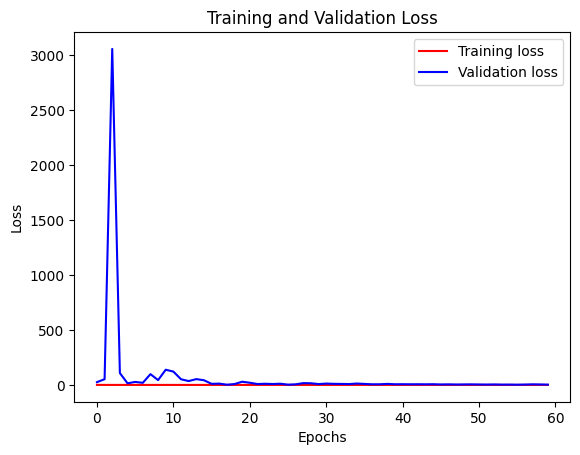

Fold2-2


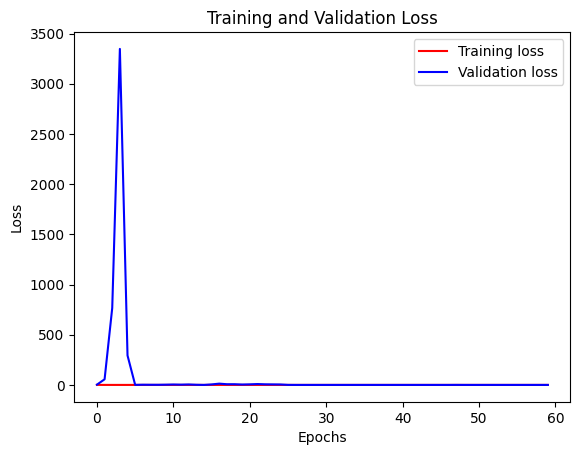

Fold2-3


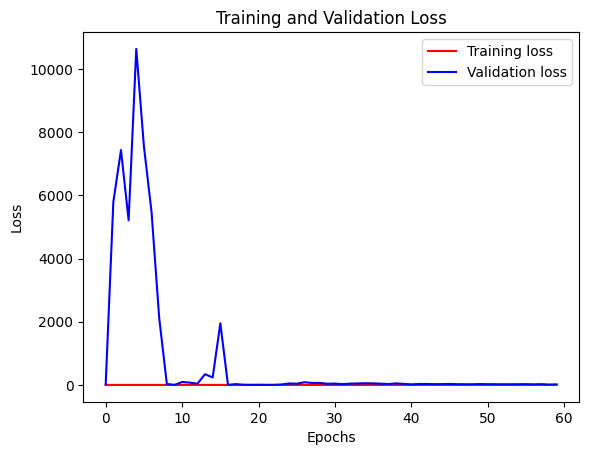

In [48]:
print("Fold2-1")
plt.plot(epochs2_1, train_loss2_1, 'r', label='Training loss')
plt.plot(epochs2_1, val_loss2_1, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold2-2")
plt.plot(epochs2_2, train_loss2_2, 'r', label='Training loss')
plt.plot(epochs2_2, val_loss2_2, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold2-3")
plt.plot(epochs2_3, train_loss2_3, 'r', label='Training loss')
plt.plot(epochs2_3, val_loss2_3, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Fold 3

## data

In [49]:
datafold3 = data[2]
datafold3

['S011/004 Angry',
 'S042/004 Angry',
 'S066/005 Angry',
 'S119/008 Angry',
 'S503/001 Angry',
 'S149/002 Contempt',
 'S503/002 Contempt',
 'S011/005 Disgust',
 'S056/002 Disgust',
 'S076/005 Disgust',
 'S096/003 Disgust',
 'S108/006 Disgust',
 'S132/005 Disgust',
 'S011/003 Fear',
 'S119/003 Fear',
 'S132/003 Fear',
 'S011/006 Happy',
 'S042/006 Happy',
 'S056/004 Happy',
 'S066/003 Happy',
 'S076/006 Happy',
 'S086/002 Happy',
 'S096/004 Happy',
 'S108/008 Happy',
 'S132/006 Happy',
 'S011/002 Sad',
 'S042/002 Sad',
 'S066/004 Sad',
 'S108/005 Sad',
 'S132/002 Sad',
 'S503/006 Sad',
 'S011/001 Surprise',
 'S042/001 Surprise',
 'S056/003 Surprise',
 'S066/002 Surprise',
 'S076/001 Surprise',
 'S086/001 Surprise',
 'S096/001 Surprise',
 'S119/001 Surprise',
 'S132/008 Surprise']

In [50]:
dest3 = "../log/lossfold3/"
losslist3 = []
for file in os.listdir(dest3):
    temp = []
    if file.startswith("cktrain_loss") and file.endswith(".txt"):
        losslist3.append(file)

lostlist

In [51]:
losslist3

['cktrain_loss_fold3-1fan_ckplus_date_25-Feb-2024-04-48-29.txt',
 'cktrain_loss_fold3-2fan_ckplus_date_25-Feb-2024-06-28-24.txt',
 'cktrain_loss_fold3-3fan_ckplus_date_25-Feb-2024-08-06-06.txt']

In [52]:
evaldestfold3 = "../log/lossfold3/eval/"
evallist_fold3 = []
for file in os.listdir(evaldestfold3):
    evallist_fold3.append(file)

evallist

In [53]:
evallist_fold3

['3-1evalfan_ckplus_date_26-Feb-2024-04-54-58.txt',
 '3-2evalfan_ckplus_date_26-Feb-2024-04-56-08.txt',
 '3-3evalfan_ckplus_date_26-Feb-2024-04-57-06.txt']

## 3-1

In [54]:
evalfile3_1 = evallist_fold3[0]

In [55]:
fold_3_1 = losslist3[0]
epochs3_1 = []
train_loss3_1 = []
val_loss3_1 = []
with open(dest3 + fold_3_1, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs3_1.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss3_1.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss3_1.append(float(temp[0]))
print(epochs3_1)
print(train_loss3_1)
print(val_loss3_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4506, 0.0682, 0.0246, 0.0108, 0.0033, 0.0025, 0.0045, 0.0012, 0.0003, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0005, 0.011, 0.02, 0.0108, 0.0035, 0.0255, 0.0233, 0.011, 0.039, 0.0174, 0.002, 0.0038, 0.0005, 0.0004, 0.0003, 0.0004, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0005, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001]
[3.8137, 24.4977, 27.6268, 13.3508, 3.6083, 4.3242, 4.0342, 3.2773, 2.7141, 2.1236, 2.2108, 2.9147, 2.8399, 2.5907, 2.6141, 1.9275, 3.8531, 0.6022, 11.4929, 3.0573, 1.9424, 14.0503, 31.9687, 12.6091, 8.6984, 16.9737, 11.2138, 9.3954, 3.442, 3.4112, 2.6785, 4.1097, 3.4393, 3.7366, 4.4061, 4.103

### prediction report

In [56]:
label_3_1, pred_3_1 = report_pred(evaldestfold3, evalfile3_1, datafold3, listvalue)

S042/002 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False


S503/006 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False


### classification report

In [57]:
print("Fold3-1")
print(classification_report(label_3_1, pred_3_1, target_names=listvalue))

Fold3-1
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         9
       Angry       0.71      1.00      0.83         5
     Disgust       1.00      1.00      1.00         6
        Fear       1.00      1.00      1.00         3
         Sad       1.00      0.67      0.80         6
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00         9

    accuracy                           0.95        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.96      0.95      0.95        40



## 3-2

In [58]:
evalfile3_2 = evallist_fold3[1]
evalfile3_2

'3-2evalfan_ckplus_date_26-Feb-2024-04-56-08.txt'

In [59]:
losslist3[1]

'cktrain_loss_fold3-2fan_ckplus_date_25-Feb-2024-06-28-24.txt'

In [60]:
fold_3_2 = losslist3[1]
epochs3_2 = []
train_loss3_2 = []
val_loss3_2 = []
with open(dest3 + fold_3_2, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs3_2.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss3_2.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss3_2.append(float(temp[0]))
print(epochs3_2)
print(train_loss3_2)
print(val_loss3_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.455, 0.0712, 0.0544, 0.0325, 0.0079, 0.001, 0.0019, 0.0052, 0.0012, 0.0004, 0.0013, 0.0003, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0003, 0.0003, 0.0003, 0.0003, 0.0002, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0003, 0.0002, 0.0003, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0002, 0.0002]
[3.5185, 11.4045, 56.3062, 1.0466, 79.4163, 88.9063, 60.8072, 16.1317, 4.3328, 13.7137, 14.8446, 0.4289, 0.8514, 2.4555, 4.3679, 3.6283, 2.6032, 2.0507, 4.6892, 6.7713, 11.0796, 13.2622, 12.7764, 16.9693, 15.4543, 15.6116, 16.0125, 14.1673, 8.5396, 10.5619, 8.6032, 14.4849, 10.6892, 6.9168

### predicition report

In [61]:
label_3_2, pred_3_2 = report_pred(evaldestfold3, evalfile3_2, datafold3, listvalue)

S042/002 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False


### classification report

In [62]:
print("Fold3-2")
print(classification_report(label_3_2, pred_3_2, target_names=listvalue))

Fold3-2
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         9
       Angry       0.83      1.00      0.91         5
     Disgust       1.00      1.00      1.00         6
        Fear       1.00      1.00      1.00         3
         Sad       1.00      0.83      0.91         6
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00         9

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.97        40
weighted avg       0.98      0.97      0.97        40



## 3-3

In [63]:
evalfile3_3 = evallist_fold3[2]
evalfile3_3

'3-3evalfan_ckplus_date_26-Feb-2024-04-57-06.txt'

In [64]:
losslist3[2]

'cktrain_loss_fold3-3fan_ckplus_date_25-Feb-2024-08-06-06.txt'

In [65]:
fold_3_3 = losslist3[2]
epochs3_3 = []
train_loss3_3 = []
val_loss3_3 = []
with open(dest3 + fold_3_3, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs3_3.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss3_3.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss3_3.append(float(temp[0]))
print(epochs3_3)
print(train_loss3_3)
print(val_loss3_3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4536, 0.0927, 0.0338, 0.015, 0.0104, 0.0078, 0.0036, 0.0005, 0.0002, 0.0002, 0.0001, 0.0002, 0.0003, 0.0001, 0.0002, 0.0004, 0.0089, 0.0147, 0.0065, 0.0004, 0.0003, 0.0002, 0.0001, 0.0002, 0.0002, 0.0001, 0.003, 0.0354, 0.0307, 0.0088, 0.0036, 0.0006, 0.0006, 0.0004, 0.0003, 0.0004, 0.0005, 0.0002, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0002, 0.0002, 0.0001, 0.0001]
[0.7609, 193.4148, 109.0248, 34.7131, 28.9709, 17.6798, 10.992, 11.7996, 9.3752, 12.7394, 8.188, 3.4491, 7.0361, 7.5266, 13.1216, 17.3161, 28.0974, 81.6839, 45.9398, 51.5334, 31.2903, 26.5521, 8.156, 14.4866, 6.8508, 5.847, 28.898, 17.4358, 65.7755, 209.3377, 4.5075, 4.0659, 4.8986, 4.7426

### prediction report

In [66]:
label_3_3, pred_3_3 = report_pred(evaldestfold3, evalfile3_3, datafold3, listvalue)

S042/002 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False


### classification report

In [67]:
print("Fold3-3")
print(classification_report(label_3_3, pred_3_3, target_names=listvalue))

Fold3-3
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         9
       Angry       0.83      1.00      0.91         5
     Disgust       1.00      1.00      1.00         6
        Fear       1.00      1.00      1.00         3
         Sad       1.00      0.83      0.91         6
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00         9

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.97        40
weighted avg       0.98      0.97      0.97        40



## loss

Fold3-1


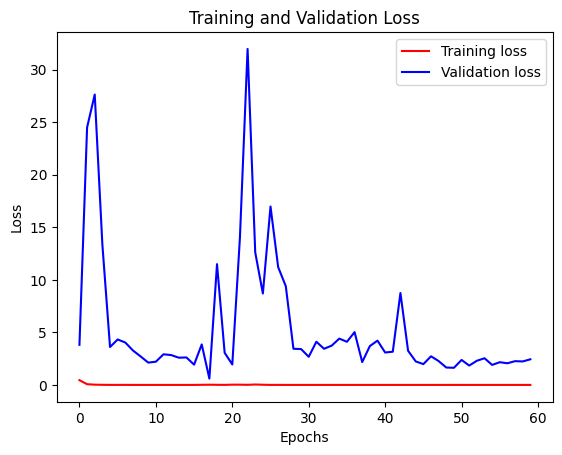

Fold3-2


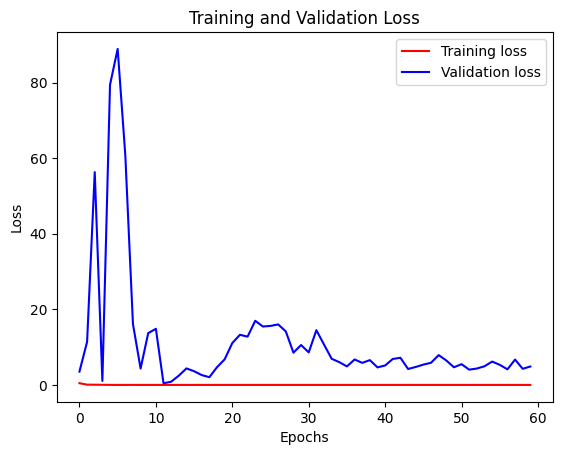

Fold3-3


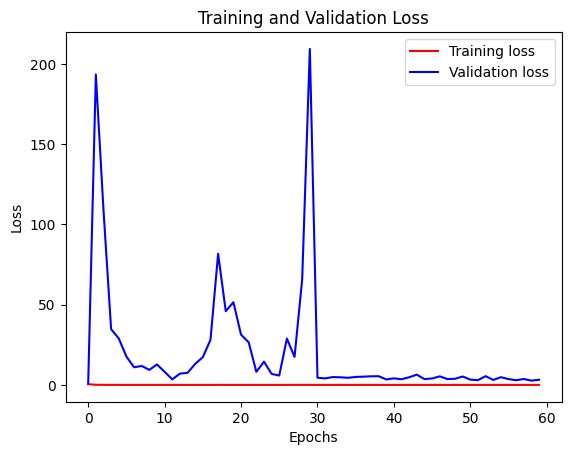

In [68]:
print("Fold3-1")
plt.plot(epochs3_1, train_loss3_1, 'r', label='Training loss')
plt.plot(epochs3_1, val_loss3_1, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold3-2")
plt.plot(epochs3_2, train_loss3_2, 'r', label='Training loss')
plt.plot(epochs3_2, val_loss3_2, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold3-3")
plt.plot(epochs3_3, train_loss3_3, 'r', label='Training loss')
plt.plot(epochs3_3, val_loss3_3, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Fold 4

## data

In [69]:
datafold4 = data[3]
datafold4

['S014/003 Angry',
 'S067/004 Angry',
 'S087/007 Angry',
 'S109/003 Angry',
 'S133/003 Angry',
 'S504/001 Angry',
 'S151/002 Contempt',
 'S504/002 Contempt',
 'S044/006 Disgust',
 'S057/003 Disgust',
 'S067/006 Disgust',
 'S077/006 Disgust',
 'S087/004 Disgust',
 'S097/004 Disgust',
 'S109/005 Disgust',
 'S504/004 Fear',
 'S014/005 Happy',
 'S044/003 Happy',
 'S057/006 Happy',
 'S067/005 Happy',
 'S087/005 Happy',
 'S097/006 Happy',
 'S109/006 Happy',
 'S133/010 Happy',
 'S014/002 Sad',
 'S504/006 Sad',
 'S014/001 Surprise',
 'S044/001 Surprise',
 'S057/001 Surprise',
 'S067/002 Surprise',
 'S077/001 Surprise',
 'S087/001 Surprise',
 'S097/001 Surprise',
 'S122/001 Surprise',
 'S133/009 Surprise']

In [70]:
dest4 = "../log/lossfold4/"
losslist4 = []
for file in os.listdir(dest4):
    temp = []
    if file.startswith("cktrain_loss") and file.endswith(".txt"):
        losslist4.append(file)

lostlist

In [71]:
losslist4

['cktrain_loss_fold4-1fan_ckplus_date_24-Feb-2024-07-00-06.txt',
 'cktrain_loss_fold4-2fan_ckplus_date_24-Feb-2024-17-13-29.txt',
 'cktrain_loss_fold4-3fan_ckplus_date_24-Feb-2024-18-48-45.txt']

In [72]:
evaldestfold4 = "../log/lossfold4/eval/"
evallist_fold4 = []
for file in os.listdir(evaldestfold4):
    evallist_fold4.append(file)

evallist

In [73]:
evallist_fold4

['4-1evalfan_ckplus_date_26-Feb-2024-04-58-15.txt',
 '4-2evalfan_ckplus_date_26-Feb-2024-04-59-07.txt',
 '4-3evalfan_ckplus_date_26-Feb-2024-05-00-29.txt']

## 4-1

In [74]:
evalfile4_1 = evallist_fold4[0]
evalfile4_1

'4-1evalfan_ckplus_date_26-Feb-2024-04-58-15.txt'

In [75]:
fold_4_1 = losslist4[0]
epochs4_1 = []
train_loss4_1 = []
val_loss4_1 = []
with open(dest4 + fold_4_1, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs4_1.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss4_1.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss4_1.append(float(temp[0]))
print(epochs4_1)
print(train_loss4_1)
print(val_loss4_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.5075, 0.0877, 0.0481, 0.045, 0.0147, 0.0102, 0.0013, 0.0038, 0.0095, 0.0042, 0.0004, 0.0004, 0.0038, 0.0068, 0.0053, 0.0066, 0.0004, 0.0003, 0.0006, 0.0008, 0.0028, 0.0042, 0.0004, 0.0255, 0.0011, 0.0006, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0002, 0.0004, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001]
[13.4969, 6.2961, 1.6311, 27.3764, 13.2161, 1.3836, 0.2207, 17.1991, 3.588, 2.2837, 6.7852, 3.389, 27.2974, 2.5015, 7.9986, 5.9893, 5.2043, 2.2995, 1.2612, 0.0, 1.6919, 1.9908, 1.5328, 4.6071, 6.8807, 6.243, 4.4365, 4.722, 4.7187, 4.4319, 1.8756, 1.3109, 4.1284, 1.7334, 2.4769, 3.4272, 2.

### prediction report

In [76]:
label_4_1, pred_4_1 = report_pred(evaldestfold4, evalfile4_1, datafold4, listvalue)

### classification report

In [77]:
print("Fold4-1")
print(classification_report(label_4_1, pred_4_1, target_names=listvalue))

Fold4-1
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         8
       Angry       1.00      1.00      1.00         6
     Disgust       1.00      1.00      1.00         7
        Fear       1.00      1.00      1.00         1
         Sad       1.00      1.00      1.00         2
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00         9

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



## 4-2

In [78]:
evalfile4_2 = evallist_fold4[1]
evalfile4_2

'4-2evalfan_ckplus_date_26-Feb-2024-04-59-07.txt'

In [79]:
fold_4_2 = losslist4[1]
epochs4_2 = []
train_loss4_2 = []
val_loss4_2 = []
with open(dest4 + fold_4_2, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs4_2.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss4_2.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss4_2.append(float(temp[0]))
print(epochs4_2)
print(train_loss4_2)
print(val_loss4_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4477, 0.0746, 0.0346, 0.0186, 0.0093, 0.0109, 0.0165, 0.006, 0.0027, 0.0004, 0.0003, 0.0007, 0.0002, 0.0003, 0.0002, 0.0005, 0.0008, 0.0118, 0.0077, 0.0004, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0012, 0.0313, 0.0173, 0.0103, 0.0022, 0.0004, 0.0003, 0.0002, 0.0003, 0.0004, 0.0003, 0.0004, 0.0002, 0.0003, 0.0002, 0.0002, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0003, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0003]
[9.9662, 20.5399, 31.4665, 22.7698, 11.0732, 338.2336, 118.627, 168.0162, 6.2787, 5.2049, 2.9516, 4.3799, 6.1556, 2.7181, 3.3091, 10.0865, 3.5113, 20.3563, 16.1838, 11.2871, 7.7544, 12.1245, 1.7373, 2.4995, 2.2053, 11.869, 2.2839, 8.1625, 6.0653, 2.7053, 2.6552, 9.4657, 4.1303, 4.5838, 2.

### prediction report

In [80]:
label_4_2, pred_4_2 = report_pred(evaldestfold4, evalfile4_2, datafold4, listvalue)

S133/003 Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False


### classification report

In [81]:
print("Fold4-2")
print(classification_report(label_4_2, pred_4_2, target_names=listvalue))

Fold4-2
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         8
       Angry       1.00      0.83      0.91         6
     Disgust       1.00      1.00      1.00         7
        Fear       1.00      1.00      1.00         1
         Sad       0.67      1.00      0.80         2
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00         9

    accuracy                           0.97        35
   macro avg       0.95      0.98      0.96        35
weighted avg       0.98      0.97      0.97        35



## 4-3

In [82]:
evalfile4_3 = evallist_fold4[2]
evalfile4_3

'4-3evalfan_ckplus_date_26-Feb-2024-05-00-29.txt'

In [83]:
losslist4[2]

'cktrain_loss_fold4-3fan_ckplus_date_24-Feb-2024-18-48-45.txt'

In [84]:
fold_4_3 = losslist4[2]
epochs4_3 = []
train_loss4_3 = []
val_loss4_3 = []
with open(dest4 + fold_4_3, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs4_3.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss4_3.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss4_3.append(float(temp[0]))
print(epochs4_3)
print(train_loss4_3)
print(val_loss4_3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4683, 0.0663, 0.0326, 0.0206, 0.0197, 0.0185, 0.0168, 0.0202, 0.0148, 0.0051, 0.0032, 0.0008, 0.0002, 0.0003, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0028, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0003, 0.0002, 0.0003, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001]
[29.2063, 9.7239, 16.6232, 32.3551, 8.7194, 10.0683, 9.0661, 0.0006, 52.7763, 2.3372, 24.0286, 8.9309, 10.3766, 9.4123, 1.084, 5.1889, 4.6359, 2.9955, 5.4144, 3.1657, 5.6019, 4.305, 3.0043, 2.142, 3.2363, 2.8392, 1.9818, 1.0249, 1.604, 1.6178, 1.1456, 0.849, 1.9486, 1.5343, 2.1404, 2.017

### prediction report

In [85]:
label_4_3, pred_4_3 = report_pred(evaldestfold4, evalfile4_3, datafold4, listvalue)

### classificatino report

In [86]:
print("Fold4-3")
print(classification_report(label_4_3, pred_4_3, target_names=listvalue))

Fold4-3
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         8
       Angry       1.00      1.00      1.00         6
     Disgust       1.00      1.00      1.00         7
        Fear       1.00      1.00      1.00         1
         Sad       1.00      1.00      1.00         2
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00         9

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



## loss

Fold4-1


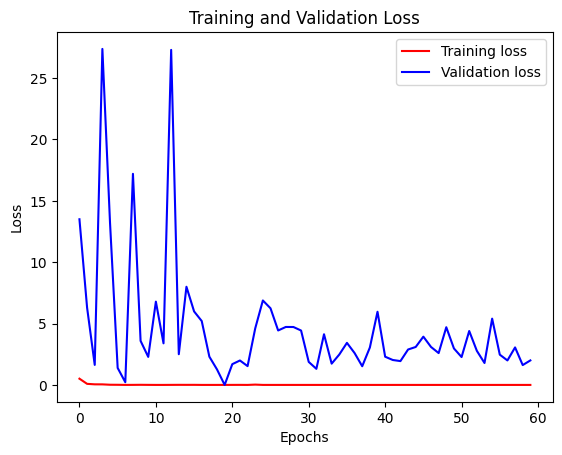

Fold4-2


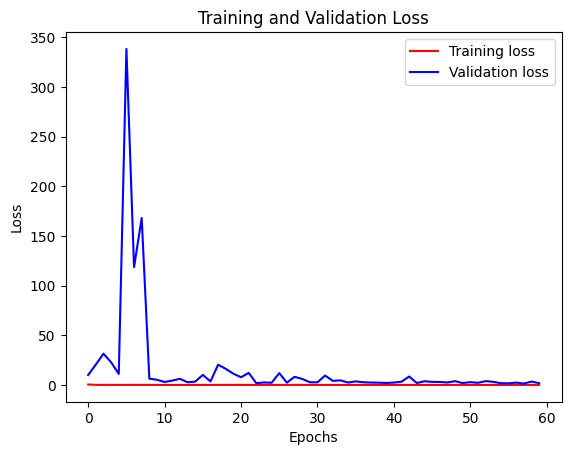

Fold4-3


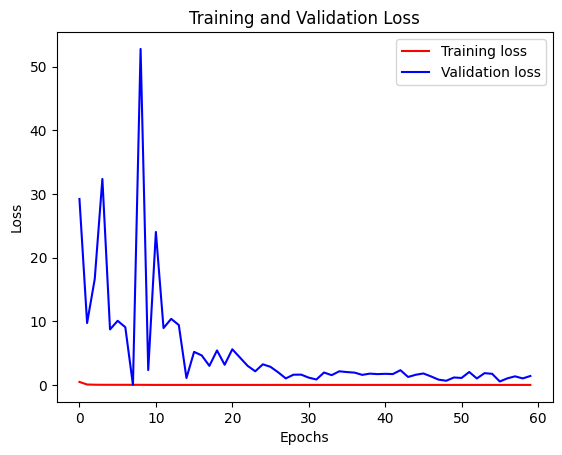

In [87]:
print("Fold4-1")
plt.plot(epochs4_1, train_loss4_1, 'r', label='Training loss')
plt.plot(epochs4_1, val_loss4_1, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold4-2")
plt.plot(epochs4_2, train_loss4_2, 'r', label='Training loss')
plt.plot(epochs4_2, val_loss4_2, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold4-3")
plt.plot(epochs4_3, train_loss4_3, 'r', label='Training loss')
plt.plot(epochs4_3, val_loss4_3, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Fold 5

## data

In [88]:
datafold5 = data[4]
datafold5

['S022/005 Angry',
 'S045/005 Angry',
 'S058/005 Angry',
 'S134/003 Angry',
 'S154/002 Contempt',
 'S505/002 Contempt',
 'S022/006 Disgust',
 'S045/004 Disgust',
 'S058/006 Disgust',
 'S068/005 Disgust',
 'S078/007 Disgust',
 'S088/004 Disgust',
 'S098/003 Disgust',
 'S124/006 Disgust',
 'S134/008 Disgust',
 'S068/004 Fear',
 'S124/003 Fear',
 'S068/002 Happy',
 'S078/004 Happy',
 'S098/004 Happy',
 'S124/007 Happy',
 'S134/004 Happy',
 'S505/006 Sad',
 'S022/001 Surprise',
 'S058/001 Surprise',
 'S068/003 Surprise',
 'S078/001 Surprise',
 'S088/001 Surprise',
 'S110/001 Surprise',
 'S124/001 Surprise']

In [89]:
dest5 = "../log/lossfold5/"
losslist5 = []
for file in os.listdir(dest5):
    temp = []
    if file.startswith("cktrain_loss") and file.endswith(".txt"):
        losslist5.append(file)

lostlist

In [90]:
losslist5

['cktrain_loss_fold5-1fan_ckplus_date_24-Feb-2024-01-52-05.txt',
 'cktrain_loss_fold5-2fan_ckplus_date_24-Feb-2024-03-51-19.txt',
 'cktrain_loss_fold5-3fan_ckplus_date_24-Feb-2024-05-27-08.txt']

In [91]:
evaldestfold5 = "../log/lossfold5/eval/"
evallist_fold5 = []
for file in os.listdir(evaldestfold5):
    evallist_fold5.append(file)

evallist

In [92]:
evallist_fold5

['5-1evalfan_ckplus_date_26-Feb-2024-05-01-52.txt',
 '5-2evalfan_ckplus_date_26-Feb-2024-05-02-59.txt',
 '5-3evalfan_ckplus_date_26-Feb-2024-05-04-02.txt']

## 5-1

In [93]:
evalfile5_1 = evallist_fold5[0]
evalfile5_1

'5-1evalfan_ckplus_date_26-Feb-2024-05-01-52.txt'

In [94]:
fold_5_1 = losslist5[0]
epochs5_1 = []
train_loss5_1 = []
val_loss5_1 = []
with open(dest5 + fold_5_1, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs5_1.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss5_1.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss5_1.append(float(temp[0]))
print(epochs5_1)
print(train_loss5_1)
print(val_loss5_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4387, 0.1076, 0.0319, 0.045, 0.0147, 0.0045, 0.0053, 0.0055, 0.0034, 0.0062, 0.0116, 0.0089, 0.0046, 0.0084, 0.0149, 0.0159, 0.0133, 0.0004, 0.0002, 0.0002, 0.0005, 0.0004, 0.0002, 0.0002, 0.0002, 0.0003, 0.0006, 0.0002, 0.0003, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0004, 0.0002, 0.0002, 0.0001, 0.0001]
[17.7165, 116.0155, 0.0, 10.0551, 86.0069, 231.0205, 405.668, 162.0681, 60.7267, 30.1202, 31.918, 16.5096, 84.0874, 0.0, 2.5132, 527.2897, 22.5562, 20.9933, 35.3921, 22.9714, 2.9615, 3.2091, 0.0, 0.0, 9.539, 14.1966, 0.0, 0.9068, 0.0, 0.643, 0.0, 0.0, 0.0, 0.0, 0.7771, 0.6552, 0.8132, 0.2

### prediction report

In [95]:
label_5_1, pred_5_1 = report_pred(evaldestfold5, evalfile5_1, datafold5, listvalue)

### classification report

In [96]:
print("Fold5-1")
print(classification_report(label_5_1, pred_5_1, target_names=listvalue))

Fold5-1
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         5
       Angry       1.00      1.00      1.00         4
     Disgust       1.00      1.00      1.00         9
        Fear       1.00      1.00      1.00         2
         Sad       1.00      1.00      1.00         1
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 5-2

In [97]:
evalfile5_2 = evallist_fold5[1]
evalfile5_2

'5-2evalfan_ckplus_date_26-Feb-2024-05-02-59.txt'

In [98]:
losslist5[1]

'cktrain_loss_fold5-2fan_ckplus_date_24-Feb-2024-03-51-19.txt'

In [99]:
fold_5_2 = losslist5[1]
epochs5_2 = []
train_loss5_2 = []
val_loss5_2 = []
with open(dest5 + fold_5_2, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs5_2.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss5_2.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss5_2.append(float(temp[0]))
print(epochs5_2)
print(train_loss5_2)
print(val_loss5_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4485, 0.0762, 0.0478, 0.0257, 0.0237, 0.0284, 0.0185, 0.0022, 0.0009, 0.0008, 0.0002, 0.0003, 0.0003, 0.0003, 0.0003, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0011, 0.0022, 0.0004, 0.0003, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001]
[122.5968, 85.6355, 16.6536, 3800.749, 79.8592, 102.823, 0.0, 2.3499, 0.0, 17.2715, 37.4391, 25.0392, 19.342, 18.6707, 46.8058, 83.339, 47.718, 53.3684, 53.7919, 18.4716, 30.1166, 96.2828, 7.9689, 6.2897, 9.7, 15.0295, 23.4894, 1.4126, 7.02, 36.3281, 57.4106, 20.555, 46.1019, 51.5535, 20

### predicition report

In [100]:
label_5_2, pred_5_2 = report_pred(evaldestfold5, evalfile5_2, datafold5, listvalue)

### classfication report

In [101]:
print("Fold5-2")
print(classification_report(label_5_2, pred_5_2, target_names=listvalue))

Fold5-2
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         5
       Angry       1.00      1.00      1.00         4
     Disgust       1.00      1.00      1.00         9
        Fear       1.00      1.00      1.00         2
         Sad       1.00      1.00      1.00         1
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 5-3

In [102]:
evalfile5_5 = evallist_fold5[2]
evalfile5_5

'5-3evalfan_ckplus_date_26-Feb-2024-05-04-02.txt'

In [103]:
losslist5[2]

'cktrain_loss_fold5-3fan_ckplus_date_24-Feb-2024-05-27-08.txt'

In [104]:
fold_5_3 = losslist5[2]
epochs5_3 = []
train_loss5_3 = []
val_loss5_3 = []
with open(dest5 + fold_5_3, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs5_3.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss5_3.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss5_3.append(float(temp[0]))
print(epochs5_3)
print(train_loss5_3)
print(val_loss5_3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.445, 0.1246, 0.0389, 0.0149, 0.0194, 0.0048, 0.0132, 0.0238, 0.0124, 0.0014, 0.0006, 0.0033, 0.0089, 0.001, 0.002, 0.0007, 0.0019, 0.0062, 0.0114, 0.0028, 0.0015, 0.0003, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0003, 0.0106, 0.0036, 0.0004, 0.0003, 0.0008, 0.0004, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
[15.5272, 26.1604, 2.9511, 89.2404, 125.323, 97.1302, 0.0, 501.7288, 0.0, 0.0, 462.0083, 547.924, 75.6171, 0.0, 0.0, 94.9376, 24.091, 928.0721, 0.0, 90.0205, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.4599, 243.0297, 294.5839, 122.064, 76.2226, 117.8147, 62.3386, 83.3606, 168.8958, 43.0991, 62.21

### prediction report

In [105]:
label_5_3, pred_5_3 = report_pred(evaldestfold5, evalfile5_5, datafold5, listvalue)

### classification report

In [106]:
print("Fold5-3")
print(classification_report(label_5_3, pred_5_3, target_names=listvalue))

Fold5-3
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         5
       Angry       1.00      1.00      1.00         4
     Disgust       1.00      1.00      1.00         9
        Fear       1.00      1.00      1.00         2
         Sad       1.00      1.00      1.00         1
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## loss

Fold5-1


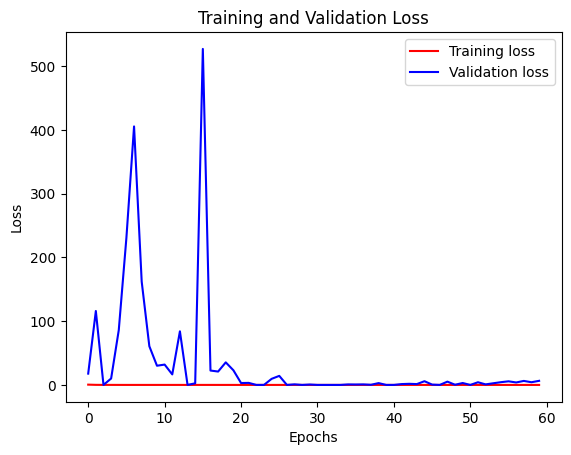

Fold5-2


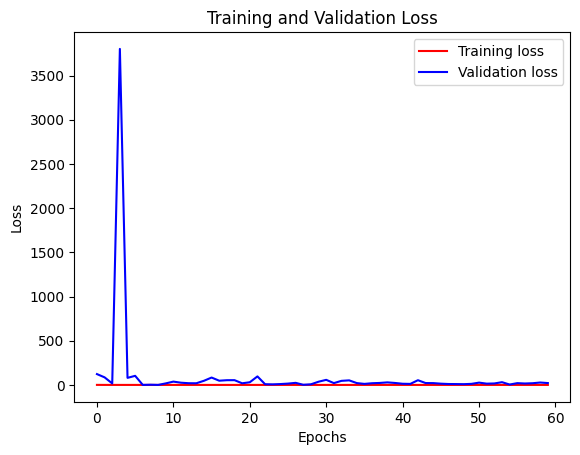

Fold5-3


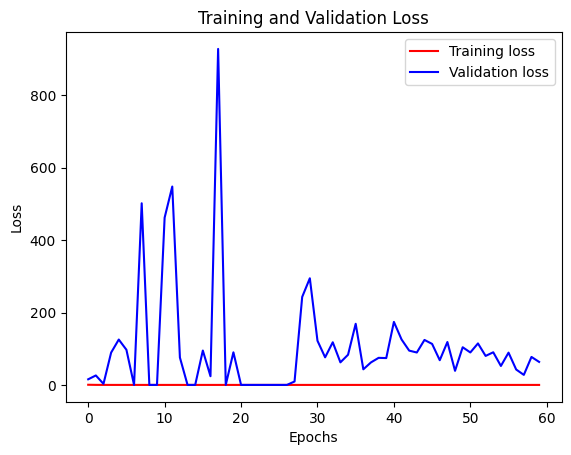

In [107]:
print("Fold5-1")
plt.plot(epochs5_1, train_loss5_1, 'r', label='Training loss')
plt.plot(epochs5_1, val_loss5_1, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold5-2")
plt.plot(epochs5_2, train_loss5_2, 'r', label='Training loss')
plt.plot(epochs5_2, val_loss5_2, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold5-3")
plt.plot(epochs5_3, train_loss5_3, 'r', label='Training loss')
plt.plot(epochs5_3, val_loss5_3, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Fold 6

## data

In [108]:
datafold6 = data[5]
datafold6

['S026/003 Angry',
 'S089/003 Angry',
 'S111/006 Angry',
 'S506/001 Angry',
 'S155/002 Contempt',
 'S506/002 Contempt',
 'S046/004 Disgust',
 'S069/003 Disgust',
 'S079/002 Disgust',
 'S099/007 Disgust',
 'S111/007 Disgust',
 'S125/008 Disgust',
 'S046/003 Fear',
 'S059/002 Fear',
 'S125/006 Fear',
 'S506/004 Fear',
 'S026/006 Happy',
 'S069/004 Happy',
 'S079/004 Happy',
 'S089/002 Happy',
 'S099/004 Happy',
 'S125/005 Happy',
 'S135/012 Happy',
 'S026/002 Sad',
 'S046/001 Sad',
 'S125/001 Sad',
 'S506/006 Sad',
 'S026/001 Surprise',
 'S046/002 Surprise',
 'S059/001 Surprise',
 'S069/002 Surprise',
 'S079/001 Surprise',
 'S089/001 Surprise',
 'S099/001 Surprise',
 'S111/001 Surprise',
 'S125/007 Surprise',
 'S135/001 Surprise']

In [109]:
dest6 = "../log/lossfold6/"
losslist6 = []
for file in os.listdir(dest6):
    temp = []
    if file.startswith("cktrain_loss") and file.endswith(".txt"):
        losslist6.append(file)

lostlist

In [110]:
losslist6

['cktrain_loss_fold6-1fan_ckplus_date_23-Feb-2024-12-46-53.txt',
 'cktrain_loss_fold6-2fan_ckplus_date_23-Feb-2024-14-43-58.txt',
 'cktrain_loss_fold6-3fan_ckplus_date_23-Feb-2024-16-25-50.txt']

In [111]:
evaldestfold6 = "../log/lossfold6/eval/"
evallist_fold6 = []
for file in os.listdir(evaldestfold6):
    evallist_fold6.append(file)

evallist

In [112]:
evallist_fold6

['6-1evalfan_ckplus_date_26-Feb-2024-05-05-24.txt',
 '6-2evalfan_ckplus_date_26-Feb-2024-05-06-54.txt',
 '6-3evalfan_ckplus_date_26-Feb-2024-05-09-29.txt']

## 6-1

In [113]:
evalfile6_1 = evallist_fold6[0]
evalfile6_1

'6-1evalfan_ckplus_date_26-Feb-2024-05-05-24.txt'

In [114]:
losslist6[0]

'cktrain_loss_fold6-1fan_ckplus_date_23-Feb-2024-12-46-53.txt'

In [115]:
fold_6_1 = losslist6[0]
epochs6_1 = []
train_loss6_1 = []
val_loss6_1 = []
with open(dest6 + fold_6_1, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs6_1.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss6_1.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss6_1.append(float(temp[0]))
print(epochs6_1)
print(train_loss6_1)
print(val_loss6_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.437, 0.113, 0.0517, 0.0092, 0.0064, 0.0028, 0.0005, 0.0003, 0.0002, 0.0024, 0.0004, 0.003, 0.0005, 0.0003, 0.0002, 0.0002, 0.0002, 0.0053, 0.0006, 0.0059, 0.0194, 0.0131, 0.0276, 0.028, 0.0074, 0.0129, 0.0029, 0.0031, 0.0004, 0.0004, 0.0005, 0.0003, 0.0003, 0.0003, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0001, 0.0002]
[61.2105, 25.7287, 234.3938, 205.5311, 108.5867, 150.823, 186.89, 159.1542, 181.5314, 120.1348, 99.2423, 187.6091, 134.8195, 225.6187, 173.668, 159.2288, 105.1316, 45.5233, 41.6107, 45.7804, 64.3922, 10.3079, 13.8999, 14.2166, 2.5099, 3.5507, 1.1022, 6.1175, 5.8206, 6.3438, 6.4854, 7.8661, 6

### prediction report

In [116]:
label_6_1, pred_6_1 = report_pred(evaldestfold6, evalfile6_1, datafold6, listvalue)

S125/007 Surprise, Label: 6 (Surprise), Pred: 3 (Fear), Correct: False


### classification report

In [117]:
print("Fold6-1")
print(classification_report(label_6_1, pred_6_1, target_names=listvalue))

Fold6-1
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         7
       Angry       1.00      1.00      1.00         4
     Disgust       1.00      1.00      1.00         6
        Fear       0.80      1.00      0.89         4
         Sad       1.00      1.00      1.00         4
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      0.90      0.95        10

    accuracy                           0.97        37
   macro avg       0.97      0.99      0.98        37
weighted avg       0.98      0.97      0.97        37



## 6-2

In [118]:
evalfile6_2 = evallist_fold6[1]
evalfile6_2

'6-2evalfan_ckplus_date_26-Feb-2024-05-06-54.txt'

In [119]:
losslist6[1]

'cktrain_loss_fold6-2fan_ckplus_date_23-Feb-2024-14-43-58.txt'

In [120]:
fold_6_2 = losslist6[1]
epochs6_2 = []
train_loss6_2 = []
val_loss6_2 = []
with open(dest6 + fold_6_2, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs6_2.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss6_2.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss6_2.append(float(temp[0]))
print(epochs6_2)
print(train_loss6_2)
print(val_loss6_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4698, 0.0582, 0.0447, 0.0565, 0.0127, 0.0052, 0.0011, 0.0004, 0.0007, 0.0114, 0.0007, 0.0003, 0.0002, 0.0001, 0.0002, 0.0012, 0.0006, 0.0003, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001]
[21.5874, 2.7897, 0.2602, 2.5203, 1.2785, 0.8321, 0.4287, 0.4905, 0.6189, 0.8723, 0.8219, 0.7818, 0.7521, 0.692, 0.6362, 0.7694, 1.2273, 0.7751, 0.7033, 0.7731, 0.8506, 0.7109, 0.8005, 0.6191, 0.6793, 0.7342, 0.7345, 0.6186, 0.5373, 0.5525, 0.6206, 0.5984, 0.5965, 0.5338, 0.542, 0.6239, 

### prediction report

In [121]:
label_6_2, pred_6_2 = report_pred(evaldestfold6, evalfile6_2, datafold6, listvalue)

S059/002 Fear, Label: 3 (Fear), Pred: 0 (Happy), Correct: False


### classification report

In [122]:
print("Fold6-2")
print(classification_report(label_6_2, pred_6_2, target_names=listvalue))

Fold6-2
              precision    recall  f1-score   support

       Happy       0.88      1.00      0.93         7
       Angry       1.00      1.00      1.00         4
     Disgust       1.00      1.00      1.00         6
        Fear       1.00      0.75      0.86         4
         Sad       1.00      1.00      1.00         4
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00        10

    accuracy                           0.97        37
   macro avg       0.98      0.96      0.97        37
weighted avg       0.98      0.97      0.97        37



## 6-3

In [123]:
evalfile6_3 = evallist_fold6[2]
evalfile6_3

'6-3evalfan_ckplus_date_26-Feb-2024-05-09-29.txt'

In [124]:
losslist6[2]

'cktrain_loss_fold6-3fan_ckplus_date_23-Feb-2024-16-25-50.txt'

In [125]:
fold_6_3 = losslist6[2]
epochs6_3 = []
train_loss6_3 = []
val_loss6_3 = []
with open(dest6 + fold_6_3, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs6_3.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss6_3.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss6_3.append(float(temp[0]))
print(epochs6_3)
print(train_loss6_3)
print(val_loss6_3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.433, 0.1, 0.0285, 0.0077, 0.0095, 0.0072, 0.005, 0.0012, 0.0006, 0.0002, 0.0001, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0004, 0.0002, 0.0002, 0.0001, 0.0001, 0.0004, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0005, 0.0003, 0.0001, 0.0001, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0002]
[100.0997, 3684.7939, 1028.234, 334.3076, 1192.0668, 1875.5463, 719.7424, 934.8685, 419.2382, 742.036, 505.9236, 563.8748, 223.1497, 609.2845, 217.1519, 372.7925, 108.3761, 123.661, 82.4147, 454.7438, 568.6552, 552.4595, 348.3701, 409.9968, 140.323, 76.5433, 64.9718, 102.3868, 92.4444, 47.853

### prediction report

In [126]:
label_6_3, pred_6_3 = report_pred(evaldestfold6, evalfile6_3, datafold6, listvalue)

S059/002 Fear, Label: 3 (Fear), Pred: 0 (Happy), Correct: False


S125/007 Surprise, Label: 6 (Surprise), Pred: 3 (Fear), Correct: False


### classification report

In [127]:
print("Fold6-3")
print(classification_report(label_6_3, pred_6_3, target_names=listvalue))

Fold6-3
              precision    recall  f1-score   support

       Happy       0.88      1.00      0.93         7
       Angry       1.00      1.00      1.00         4
     Disgust       1.00      1.00      1.00         6
        Fear       0.75      0.75      0.75         4
         Sad       1.00      1.00      1.00         4
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      0.90      0.95        10

    accuracy                           0.95        37
   macro avg       0.95      0.95      0.95        37
weighted avg       0.95      0.95      0.95        37



## loss

Fold6-1


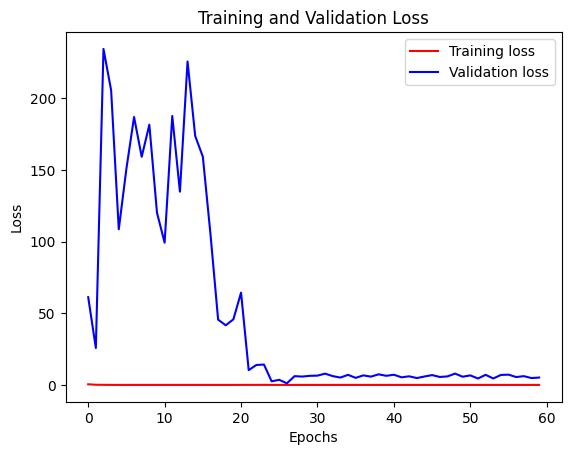

Fold6-2


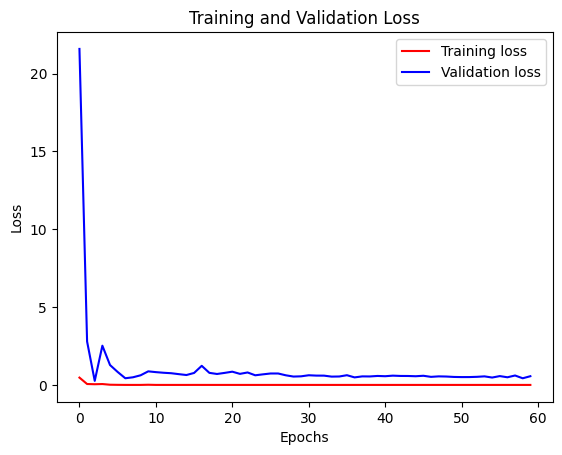

Fold6-3


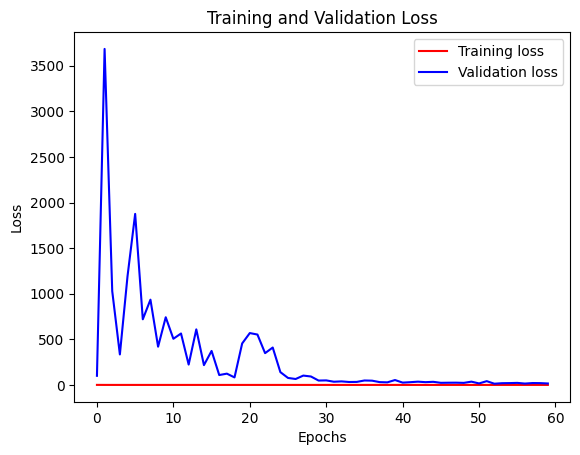

In [128]:
print("Fold6-1")
plt.plot(epochs6_1, train_loss6_1, 'r', label='Training loss')
plt.plot(epochs6_1, val_loss6_1, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold6-2")
plt.plot(epochs6_2, train_loss6_2, 'r', label='Training loss')
plt.plot(epochs6_2, val_loss6_2, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold6-3")
plt.plot(epochs6_3, train_loss6_3, 'r', label='Training loss')
plt.plot(epochs6_3, val_loss6_3, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Fold 7

## data

In [129]:
datafold7 = data[6]
datafold7

['S028/001 Angry',
 'S050/004 Angry',
 'S090/007 Angry',
 'S100/005 Angry',
 'S112/005 Angry',
 'S126/008 Angry',
 'S136/005 Angry',
 'S156/002 Contempt',
 'S895/002 Contempt',
 'S060/005 Disgust',
 'S070/005 Disgust',
 'S080/008 Disgust',
 'S090/006 Disgust',
 'S050/001 Fear',
 'S050/006 Happy',
 'S060/002 Happy',
 'S070/003 Happy',
 'S100/006 Happy',
 'S136/006 Happy',
 'S080/005 Sad',
 'S136/003 Sad',
 'S050/002 Surprise',
 'S060/003 Surprise',
 'S070/002 Surprise',
 'S080/001 Surprise',
 'S090/002 Surprise',
 'S100/002 Surprise',
 'S126/004 Surprise',
 'S136/001 Surprise']

In [130]:
dest7 = "../log/lossfold7/"
losslist7 = []
for file in os.listdir(dest7):
    temp = []
    if file.startswith("cktrain_loss") and file.endswith(".txt"):
        losslist7.append(file)

lostlist

In [131]:
losslist7

['cktrain_loss_fold7-1fan_ckplus_date_23-Feb-2024-01-51-26.txt',
 'cktrain_loss_fold7-2fan_ckplus_date_23-Feb-2024-03-27-45.txt',
 'cktrain_loss_fold7-3fan_ckplus_date_23-Feb-2024-10-46-57.txt']

In [133]:
evaldestfold7 = "../log/lossfold7/eval/"
evallist_fold7 = []
for file in os.listdir(evaldestfold7):
    evallist_fold7.append(file)

evallist

In [134]:
evallist_fold7

['7-1evalfan_ckplus_date_26-Feb-2024-05-12-16.txt',
 '7-2evalfan_ckplus_date_26-Feb-2024-05-13-37.txt',
 '7-3evalfan_ckplus_date_26-Feb-2024-05-14-31.txt']

## 7-1

In [135]:
evalfile7_1 = evallist_fold7[0]
evalfile7_1

'7-1evalfan_ckplus_date_26-Feb-2024-05-12-16.txt'

In [136]:
losslist7[0]

'cktrain_loss_fold7-1fan_ckplus_date_23-Feb-2024-01-51-26.txt'

In [137]:
fold_7_1 = losslist7[0]
epochs7_1 = []
train_loss7_1 = []
val_loss7_1 = []
with open(dest7 + fold_7_1, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs7_1.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss7_1.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss7_1.append(float(temp[0]))
print(epochs7_1)
print(train_loss7_1)
print(val_loss7_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4058, 0.1811, 0.4616, 0.0865, 0.0581, 0.0147, 0.0052, 0.0173, 0.0324, 0.0061, 0.0018, 0.0832, 0.0832, 0.0168, 0.0187, 0.0033, 0.2048, 0.0092, 0.0263, 0.0091, 0.0025, 0.0018, 0.1036, 0.0209, 0.0092, 0.0344, 0.008, 0.0067, 0.005, 0.0012, 0.001, 0.0006, 0.0004, 0.0003, 0.0004, 0.0005, 0.0007, 0.0036, 0.0006, 0.0007, 0.0014, 0.0097, 0.0016, 0.0011, 0.003, 0.0012, 0.0032, 0.001, 0.001, 0.0006, 0.0006, 0.0005, 0.0009, 0.002, 0.0005, 0.0008, 0.0012, 0.0023, 0.0005, 0.0006]
[4.6526, 8034224.5, 148.6955, 57.8381, 180.446, 42.3636, 57.4068, 293.6627, 228.0184, 64.1476, 146.7188, 337.9734, 1602.7095, 146.3223, 263.9464, 2759.52, 459.9315, 3275.5449, 363.6057, 180.7047, 1062.7242, 30835.3906, 4437.5244, 10284.7842, 10797.4453, 338.6242, 4.776, 99.7766, 11.8387, 19.048

### prediction report

In [138]:
label_7_1, pred_7_1 = report_pred(evaldestfold7, evalfile7_1, datafold7, listvalue)

### classification report

In [139]:
print("Fold7-1")    
print(classification_report(label_7_1, pred_7_1, target_names=listvalue))

Fold7-1
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         5
       Angry       1.00      1.00      1.00         7
     Disgust       1.00      1.00      1.00         4
        Fear       1.00      1.00      1.00         1
         Sad       1.00      1.00      1.00         2
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00         8

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



## 7-2

In [140]:
evalfile7_2 = evallist_fold7[1]
evalfile7_2

'7-2evalfan_ckplus_date_26-Feb-2024-05-13-37.txt'

In [141]:
losslist7[1]

'cktrain_loss_fold7-2fan_ckplus_date_23-Feb-2024-03-27-45.txt'

In [142]:
fold_7_2 = losslist7[1]
epochs7_2 = []
train_loss7_2 = []
val_loss7_2 = []
with open(dest7 + fold_7_2, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs7_2.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss7_2.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss7_2.append(float(temp[0]))
print(epochs7_2)
print(train_loss7_2)
print(val_loss7_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4736, 0.2057, 0.1341, 0.1182, 0.027, 0.0156, 0.0093, 0.0108, 0.002, 0.0134, 0.0015, 0.0004, 0.0021, 0.0006, 0.0009, 0.0115, 0.0989, 0.019, 0.0735, 0.0087, 0.0082, 0.0027, 0.0015, 0.0003, 0.0004, 0.0003, 0.0003, 0.0088, 0.0007, 0.0004, 0.0003, 0.0007, 0.0106, 0.0007, 0.0006, 0.0031, 0.0404, 0.0025, 0.0015, 0.0011, 0.001, 0.0007, 0.001, 0.0006, 0.0005, 0.0008, 0.0006, 0.0008, 0.0005, 0.0012, 0.0116, 0.0067, 0.0019, 0.0013, 0.0014, 0.0009, 0.0007, 0.0007, 0.0004, 0.0006]
[15.0485, 8.8246, 1261.2848, 8252.1738, 1176.9146, 6515.4756, 3570.1658, 1885.2346, 4793.2354, 303.1385, 803.1213, 1339.9301, 482.205, 1022.1596, 1068.0437, 277.9991, 363.6402, 697.2596, 4219.3687, 1913.1145, 113.0911, 406.9746, 1933.6129, 109.4602, 1174.1425, 832.9945, 156.718, 644.836, 1194

### prediction report

In [143]:
label_7_2, pred_7_2 = report_pred(evaldestfold7, evalfile7_2, datafold7, listvalue)

S080/005 Sad, Label: 4 (Sad), Pred: 1 (Angry), Correct: False


### classification report

In [144]:
print("Fold7-2")        
print(classification_report(label_7_2, pred_7_2, target_names=listvalue))

Fold7-2
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         5
       Angry       0.88      1.00      0.93         7
     Disgust       1.00      1.00      1.00         4
        Fear       1.00      1.00      1.00         1
         Sad       1.00      0.50      0.67         2
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00         8

    accuracy                           0.97        29
   macro avg       0.98      0.93      0.94        29
weighted avg       0.97      0.97      0.96        29



## 7-3

In [145]:
evalfile7_3 = evallist_fold7[2]
evalfile7_3

'7-3evalfan_ckplus_date_26-Feb-2024-05-14-31.txt'

In [146]:
losslist7[2]

'cktrain_loss_fold7-3fan_ckplus_date_23-Feb-2024-10-46-57.txt'

In [147]:
fold_7_3 = losslist7[2]
epochs7_3 = []
train_loss7_3 = []
val_loss7_3 = []
with open(dest7 + fold_7_3, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs7_3.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss7_3.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss7_3.append(float(temp[0]))
print(epochs7_3)
print(train_loss7_3)
print(val_loss7_3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.3984, 0.0713, 0.0497, 0.0231, 0.0146, 0.0472, 0.2367, 0.207, 0.0486, 0.2057, 0.0461, 0.336, 0.0387, 0.0878, 0.1721, 0.1829, 0.0589, 0.0361, 0.0202, 0.004, 0.1477, 0.0197, 0.0149, 0.0052, 0.0087, 0.322, 0.0277, 0.0444, 0.0278, 0.0087, 0.0048, 0.0069, 0.0021, 0.0024, 0.0143, 0.0024, 0.0012, 0.0024, 0.0172, 0.0035, 0.0695, 0.0073, 0.0035, 0.0027, 0.0029, 0.0116, 0.0122, 0.0022, 0.0017, 0.003, 0.001, 0.0014, 0.0084, 0.002, 0.0024, 0.0014, 0.0012, 0.001, 0.0015, 0.0008]
[44.0914, 69.645, 71.2301, 86.7568, 76.9847, 35497572.0, 73320.8359, 115.4061, 4693.8105, 29.7818, 438.7464, 4.3606, 27.008, 110.9342, 68.2662, 145.1105, 1033.6542, 494.3871, 5895.6338, 6580.7817, 270.8754, 405.823, 5494.583, 1122.9692, 11134.7793, 213.435, 462.5829, 465.2745, 348.5873, 97.9969,

### prediction report

In [148]:
label_7_3, pred_7_3 = report_pred(evaldestfold7, evalfile7_3, datafold7, listvalue)

S156/002 Contempt, Label: 5 (Contempt), Pred: 0 (Happy), Correct: False


S895/002 Contempt, Label: 5 (Contempt), Pred: 2 (Disgust), Correct: False


### classification report

In [149]:
print("Fold7-3")
print(classification_report(label_7_3, pred_7_3, target_names=listvalue))

Fold7-3
              precision    recall  f1-score   support

       Happy       0.83      1.00      0.91         5
       Angry       1.00      1.00      1.00         7
     Disgust       0.80      1.00      0.89         4
        Fear       1.00      1.00      1.00         1
         Sad       1.00      1.00      1.00         2
    Contempt       0.00      0.00      0.00         2
    Surprise       1.00      1.00      1.00         8

    accuracy                           0.93        29
   macro avg       0.80      0.86      0.83        29
weighted avg       0.87      0.93      0.90        29



c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\panpo\anaconda3\envs\emotion_fan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## loss

Fold7-1


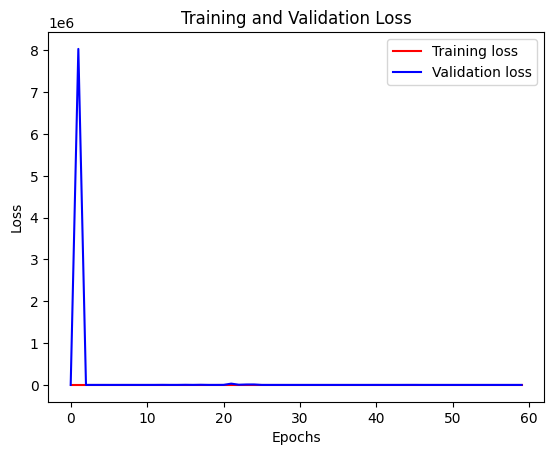

Fold7-2


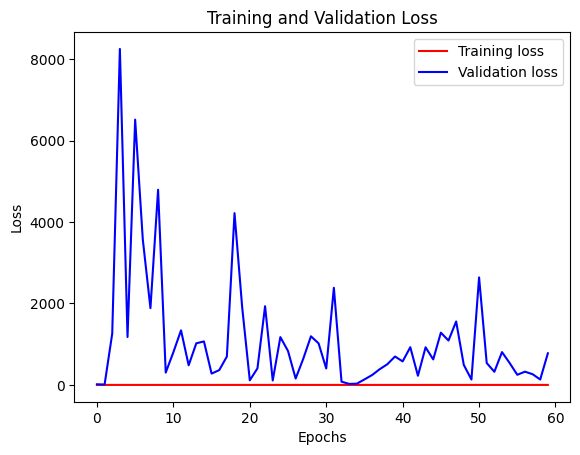

Fold7-3


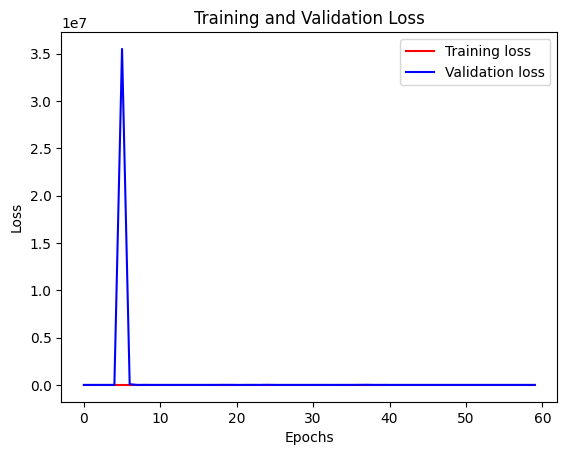

In [150]:
print("Fold7-1")
plt.plot(epochs7_1, train_loss7_1, 'r', label='Training loss')
plt.plot(epochs7_1, val_loss7_1, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold7-2")
plt.plot(epochs7_2, train_loss7_2, 'r', label='Training loss')
plt.plot(epochs7_2, val_loss7_2, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold7-3")
plt.plot(epochs7_3, train_loss7_3, 'r', label='Training loss')
plt.plot(epochs7_3, val_loss7_3, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Fold 8

## data

In [151]:
datafold8 = data[7]
datafold8

['S029/001 Angry',
 'S071/004 Angry',
 'S113/008 Angry',
 'S127/010 Angry',
 'S999/001 Angry',
 'S157/002 Contempt',
 'S051/003 Disgust',
 'S061/004 Disgust',
 'S071/006 Disgust',
 'S081/008 Disgust',
 'S091/001 Fear',
 'S999/003 Fear',
 'S061/002 Happy',
 'S071/005 Happy',
 'S091/003 Happy',
 'S127/004 Happy',
 'S137/011 Happy',
 'S071/002 Sad',
 'S081/002 Sad',
 'S113/003 Sad',
 'S137/005 Sad',
 'S051/002 Surprise',
 'S061/001 Surprise',
 'S071/001 Surprise',
 'S081/001 Surprise',
 'S101/002 Surprise',
 'S113/001 Surprise',
 'S127/001 Surprise',
 'S137/001 Surprise']

In [152]:
dest8 = "../log/lossfold8/"
losslist8 = []
for file in os.listdir(dest8):
    temp = []
    if file.startswith("cktrain_loss") and file.endswith(".txt"):
        losslist8.append(file)

lostlist

In [153]:
losslist8

['cktrain_loss_fold8-1fan_ckplus_date_22-Feb-2024-13-43-07.txt',
 'cktrain_loss_fold8-2fan_ckplus_date_22-Feb-2024-15-23-11.txt',
 'cktrain_loss_fold8-3fan_ckplus_date_22-Feb-2024-17-00-05.txt']

In [154]:
evaldestfold8 = "../log/lossfold8/eval/"
evallist_fold8 = []
for file in os.listdir(evaldestfold8):
    evallist_fold8.append(file)

evallist

In [155]:
evallist_fold8

['8-1evalfan_ckplus_date_26-Feb-2024-05-16-53.txt',
 '8-2evalfan_ckplus_date_26-Feb-2024-05-18-10.txt',
 '8-3evalfan_ckplus_date_26-Feb-2024-05-19-15.txt']

## 8-1

In [156]:
evalfile8_1 = evallist_fold8[0]
evalfile8_1

'8-1evalfan_ckplus_date_26-Feb-2024-05-16-53.txt'

In [157]:
losslist8[0]

'cktrain_loss_fold8-1fan_ckplus_date_22-Feb-2024-13-43-07.txt'

In [158]:
fold_8_1 = losslist8[0]
epochs8_1 = []
train_loss8_1 = []
val_loss8_1 = []
with open(dest8 + fold_8_1, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs8_1.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss8_1.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss8_1.append(float(temp[0]))
print(epochs8_1)
print(train_loss8_1)
print(val_loss8_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4605, 0.079, 0.0515, 0.0443, 0.0134, 0.0093, 0.0093, 0.0043, 0.0265, 0.0033, 0.001, 0.0051, 0.0056, 0.0011, 0.0003, 0.0002, 0.0004, 0.0009, 0.0032, 0.0014, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001, 0.0002, 0.0005, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0004, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001]
[1.4383, 2.0737, 75.9932, 0.0, 1.045, 26.0293, 0.0, 2.965, 0.9629, 0.6639, 0.6319, 0.6584, 0.6103, 1.1345, 2.0532, 1.2607, 0.7671, 3.0831, 1.5493, 0.4838, 0.4932, 0.5402, 0.4452, 0.353, 0.0666, 0.2515, 0.011, 0.009, 0.1477, 0.0004, 0.0005, 0.0013, 0.1903, 0.0248, 0.1066, 0.105, 0.0019, 0.0

### prediction report

In [159]:
label_8_1, pred_8_1 = report_pred(evaldestfold8, evalfile8_1, datafold8, listvalue)

### classification report

In [160]:
print("Fold8-1")
print(classification_report(label_8_1, pred_8_1, target_names=listvalue))

Fold8-1
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         5
       Angry       1.00      1.00      1.00         5
     Disgust       1.00      1.00      1.00         4
        Fear       1.00      1.00      1.00         2
         Sad       1.00      1.00      1.00         4
    Contempt       1.00      1.00      1.00         1
    Surprise       1.00      1.00      1.00         8

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



## 8-2

In [161]:
evalfile8_2 = evallist_fold8[1]
evalfile8_2

'8-2evalfan_ckplus_date_26-Feb-2024-05-18-10.txt'

In [162]:
losslist8[1]

'cktrain_loss_fold8-2fan_ckplus_date_22-Feb-2024-15-23-11.txt'

In [163]:
fold_8_2 = losslist8[1]
epochs8_2 = []
train_loss8_2 = []
val_loss8_2 = []
with open(dest8 + fold_8_2, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs8_2.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss8_2.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss8_2.append(float(temp[0]))
print(epochs8_2)
print(train_loss8_2)
print(val_loss8_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4368, 0.0691, 0.0377, 0.0248, 0.0094, 0.032, 0.0129, 0.0075, 0.0046, 0.0025, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002, 0.0003, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0004, 0.016, 0.002, 0.0014, 0.0565, 0.0291, 0.0791, 0.0143, 0.0047, 0.0029, 0.0016, 0.0011, 0.0009, 0.0006, 0.0006, 0.0007, 0.0006, 0.0005, 0.0004, 0.0004, 0.0004, 0.0004, 0.0003, 0.0005, 0.0004, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0002, 0.0002, 0.0004, 0.0003, 0.0003, 0.0002, 0.0002]
[0.0, 1.692, 13.1308, 0.7891, 2.5959, 0.0, 0.1272, 0.0, 0.0, 1.4402, 0.0008, 0.0002, 0.0, 0.0002, 0.0, 1.3757, 0.0003, 0.0, 0.0, 0.5149, 0.0, 0.0, 0.0, 0.0411, 0.0735, 0.6152, 0.0516, 3.7085, 5.7705, 12.4532, 10.3628, 8.9484, 7.5061, 10.8788, 26.55, 32.0633, 22.7509, 33.3447, 33.8345, 32.10

### classification report

In [164]:
label_8_2, pred_8_2 = report_pred(evaldestfold8, evalfile8_2, datafold8, listvalue)

### prediction report

In [165]:
print("Fold8-2")
print(classification_report(label_8_2, pred_8_2, target_names=listvalue))

Fold8-2
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         5
       Angry       1.00      1.00      1.00         5
     Disgust       1.00      1.00      1.00         4
        Fear       1.00      1.00      1.00         2
         Sad       1.00      1.00      1.00         4
    Contempt       1.00      1.00      1.00         1
    Surprise       1.00      1.00      1.00         8

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



 ## 8-3

In [166]:
evalfile8_3 = evallist_fold8[2]
evalfile8_3

'8-3evalfan_ckplus_date_26-Feb-2024-05-19-15.txt'

In [167]:
losslist8[2]

'cktrain_loss_fold8-3fan_ckplus_date_22-Feb-2024-17-00-05.txt'

In [168]:
fold_8_3 = losslist8[2]
epochs8_3 = []
train_loss8_3 = []
val_loss8_3 = []
with open(dest8 + fold_8_3, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs8_3.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss8_3.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss8_3.append(float(temp[0]))
print(epochs8_3)
print(train_loss8_3)
print(val_loss8_3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4597, 0.0766, 0.0443, 0.0229, 0.0146, 0.0166, 0.0135, 0.0116, 0.0052, 0.0052, 0.0007, 0.0003, 0.0001, 0.0001, 0.0001, 0.0001, 0.0023, 0.0033, 0.0067, 0.0004, 0.0003, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0003, 0.0002, 0.0001, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002]
[1.7908, 1.9213, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 54.104, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0094, 0.0, 0.0, 0.0, 6.6171, 0.0, 0.0, 1.0025, 1.0512, 0.7182, 0.7377, 1.2419, 0.6567, 0.0, 0.2262, 0.2075, 0.5745, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.4066, 0.0, 0.0001, 0.0, 0.0, 0.0057, 0.0003, 0.0, 

### prediction report

In [169]:
label_8_3, pred_8_3 = report_pred(evaldestfold8, evalfile8_3, datafold8, listvalue)

### classification report

In [170]:
print("Fold8-3")
print(classification_report(label_8_3, pred_8_3, target_names=listvalue))

Fold8-3
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         5
       Angry       1.00      1.00      1.00         5
     Disgust       1.00      1.00      1.00         4
        Fear       1.00      1.00      1.00         2
         Sad       1.00      1.00      1.00         4
    Contempt       1.00      1.00      1.00         1
    Surprise       1.00      1.00      1.00         8

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



## loss

Fold8-1


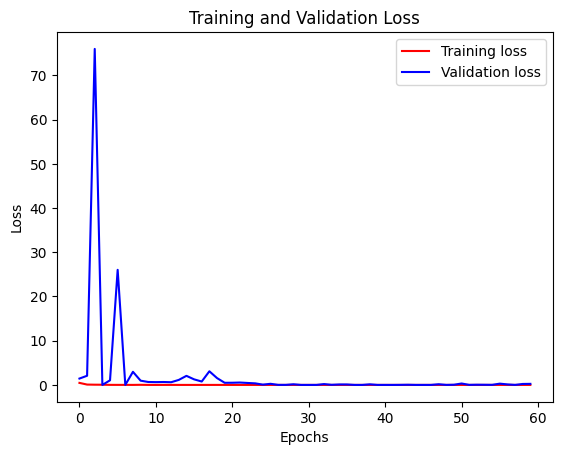

Fold8-2


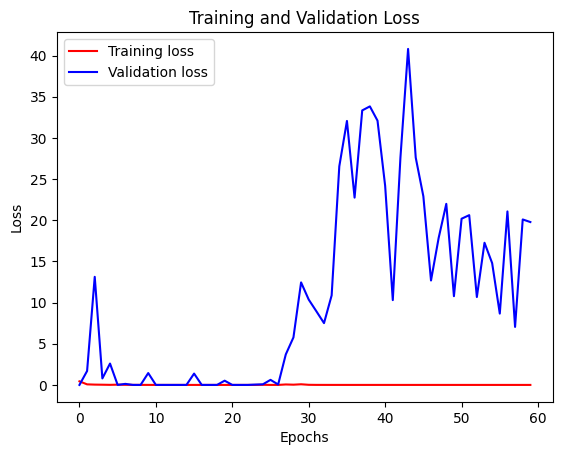

Fold8-3


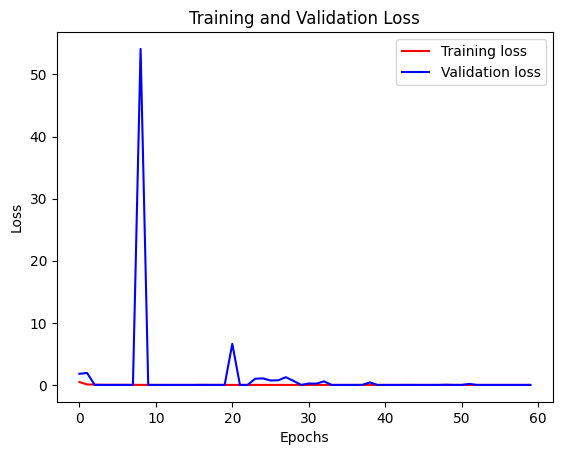

In [171]:
print("Fold8-1")
plt.plot(epochs8_1, train_loss8_1, 'r', label='Training loss')
plt.plot(epochs8_1, val_loss8_1, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold8-2")
plt.plot(epochs8_2, train_loss8_2, 'r', label='Training loss')
plt.plot(epochs8_2, val_loss8_2, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold8-3")
plt.plot(epochs8_3, train_loss8_3, 'r', label='Training loss')
plt.plot(epochs8_3, val_loss8_3, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Fold 9

## data

In [172]:
datafold9 = data[8]
datafold9

['S032/003 Angry',
 'S072/005 Angry',
 'S082/005 Angry',
 'S092/003 Angry',
 'S138/008 Contempt',
 'S158/002 Contempt',
 'S032/005 Disgust',
 'S052/006 Disgust',
 'S062/005 Disgust',
 'S082/007 Disgust',
 'S102/009 Disgust',
 'S128/004 Disgust',
 'S032/004 Fear',
 'S062/001 Fear',
 'S102/003 Fear',
 'S138/001 Fear',
 'S032/006 Happy',
 'S052/004 Happy',
 'S062/004 Happy',
 'S072/006 Happy',
 'S092/004 Happy',
 'S114/006 Happy',
 'S128/011 Happy',
 'S138/005 Happy',
 'S138/007 Sad',
 'S032/001 Surprise',
 'S052/001 Surprise',
 'S062/002 Surprise',
 'S082/001 Surprise',
 'S092/001 Surprise',
 'S102/002 Surprise',
 'S114/001 Surprise',
 'S138/004 Surprise']

In [174]:
dest9 = "../log/lossfold9/"
losslist9 = []
for file in os.listdir(dest9):
    temp = []
    if file.startswith("cktrain_loss") and file.endswith(".txt"):
        losslist9.append(file)

lostlist

In [175]:
losslist9

['cktrain_loss_fold9-1fan_ckplus_date_21-Feb-2024-17-32-53.txt',
 'cktrain_loss_fold9-2fan_ckplus_date_22-Feb-2024-01-55-43.txt',
 'cktrain_loss_fold9-3fan_ckplus_date_22-Feb-2024-11-15-24.txt']

In [177]:
evaldestfold9 = "../log/lossfold9/eval/"
evallist_fold9 = []
for file in os.listdir(evaldestfold9):
    evallist_fold9.append(file)

evallist

In [178]:
evallist_fold9

['9-1evalfan_ckplus_date_26-Feb-2024-05-22-05.txt',
 '9-2evalfan_ckplus_date_26-Feb-2024-05-22-55.txt',
 '9-3evalfan_ckplus_date_26-Feb-2024-05-23-47.txt']

## 9-1

In [179]:
evalfile9_1 = evallist_fold9[0]
evalfile9_1

'9-1evalfan_ckplus_date_26-Feb-2024-05-22-05.txt'

In [180]:
losslist9[0]

'cktrain_loss_fold9-1fan_ckplus_date_21-Feb-2024-17-32-53.txt'

In [181]:
fold_9_1 = losslist9[0]
epochs9_1 = []
train_loss9_1 = []
val_loss9_1 = []
with open(dest9 + fold_9_1, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs9_1.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss9_1.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss9_1.append(float(temp[0]))
print(epochs9_1)
print(train_loss9_1)
print(val_loss9_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4926, 0.0731, 0.0595, 0.0487, 0.0143, 0.0036, 0.0046, 0.0007, 0.0003, 0.0004, 0.0003, 0.0002, 0.0005, 0.0052, 0.0004, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0002, 0.0002, 0.0001, 0.0001, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002]
[0.0037, 55.5096, 7.8687, 5.7946, 0.5805, 2.6943, 0.6254, 0.4381, 0.8853, 0.4431, 2.2023, 4.536, 0.5555, 2.8865, 0.3008, 0.427, 0.284, 2.0366, 3.2723, 1.1918, 2.646, 2.1369, 2.2279, 2.369, 1.8541, 1.4173, 3.2608, 2.5332, 3.505, 2.9098, 3.9968, 3.2316, 2.9271, 2.1575, 2.5123, 2.7922, 3.15

### prediction report

In [182]:
label_9_1, pred_9_1 = report_pred(evaldestfold9, evalfile9_1, datafold9, listvalue)

### classification report

In [183]:
print("Fold9-1")
print(classification_report(label_9_1, pred_9_1, target_names=listvalue))

Fold9-1
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         8
       Angry       1.00      1.00      1.00         4
     Disgust       1.00      1.00      1.00         6
        Fear       1.00      1.00      1.00         4
         Sad       1.00      1.00      1.00         1
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00         8

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



## 9-2

In [184]:
evalfile9_2 = evallist_fold9[1]
evalfile9_2

'9-2evalfan_ckplus_date_26-Feb-2024-05-22-55.txt'

In [185]:
losslist9[1]

'cktrain_loss_fold9-2fan_ckplus_date_22-Feb-2024-01-55-43.txt'

In [186]:
fold_9_2 = losslist9[1]
epochs9_2 = []
train_loss9_2 = []
val_loss9_2 = []
with open(dest9 + fold_9_2, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs9_2.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss9_2.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss9_2.append(float(temp[0]))
print(epochs9_2)
print(train_loss9_2)
print(val_loss9_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4483, 0.0899, 0.0308, 0.0133, 0.0095, 0.0257, 0.0067, 0.005, 0.0011, 0.0003, 0.0179, 0.004, 0.0009, 0.0152, 0.0172, 0.0112, 0.0128, 0.0028, 0.0014, 0.0015, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0005, 0.0002, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
[48.1745, 7.189, 28.9204, 38.4461, 175.5986, 7.03, 10.0822, 8.0471, 11.2726, 12.1826, 484.3171, 75.4115, 74.2309, 42.4379, 230.9382, 1315.2946, 324.8899, 27.5946, 10.4395, 10.3322, 7.674, 1.1568, 4.7699, 3.3009, 2.6865, 0.0, 4.0121, 0.0, 5.6734, 22.4657, 100.2295, 0.0, 0.0, 0.0, 0.0, 15.36

### prediction report

In [187]:
label_9_2, pred_9_2 = report_pred(evaldestfold9, evalfile9_2, datafold9, listvalue)

### classification report

In [188]:
print("Fold9-2")
print(classification_report(label_9_2, pred_9_2, target_names=listvalue))

Fold9-2
              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00         8
       Angry       1.00      1.00      1.00         4
     Disgust       1.00      1.00      1.00         6
        Fear       1.00      1.00      1.00         4
         Sad       1.00      1.00      1.00         1
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00         8

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



## 9-3

In [189]:
evalfile9_3 = evallist_fold9[2]
evalfile9_3

'9-3evalfan_ckplus_date_26-Feb-2024-05-23-47.txt'

In [190]:
losslist9[2]

'cktrain_loss_fold9-3fan_ckplus_date_22-Feb-2024-11-15-24.txt'

In [191]:
fold_9_3 = losslist9[2]
epochs9_3 = []
train_loss9_3 = []
val_loss9_3 = []
with open(dest9 + fold_9_3, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs9_3.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss9_3.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss9_3.append(float(temp[0]))
print(epochs9_3)
print(train_loss9_3)
print(val_loss9_3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.479, 0.0838, 0.0284, 0.0316, 0.0272, 0.0097, 0.0021, 0.0048, 0.0155, 0.0029, 0.0015, 0.0152, 0.0507, 0.0232, 0.0202, 0.0182, 0.0092, 0.0038, 0.0007, 0.0003, 0.0003, 0.0002, 0.0019, 0.0029, 0.0059, 0.006, 0.0115, 0.0224, 0.0078, 0.0018, 0.0008, 0.0004, 0.0004, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0004, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0005, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0003, 0.0002, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001]
[29.4201, 53.7279, 121.3936, 644.1597, 93.3027, 115.8081, 174.9651, 56.4872, 136.4984, 114.3534, 134.0224, 42.4201, 0.841, 326.1007, 83.1499, 39.3462, 66.235, 66.7464, 76.343, 42.3457, 48.1762, 62.6295, 121.103, 57.3235, 46.2366, 26.152, 119.5048, 611.9601, 40.7156, 67.1844, 85.8537, 61.23

### prediction report

In [192]:
label_9_3, pred_9_3 = report_pred(evaldestfold9, evalfile9_3, datafold9, listvalue)

S062/005 Disgust, Label: 2 (Disgust), Pred: 0 (Happy), Correct: False


### classification report

In [193]:
print("Fold9-3")
print(classification_report(label_9_3, pred_9_3, target_names=listvalue))

Fold9-3
              precision    recall  f1-score   support

       Happy       0.89      1.00      0.94         8
       Angry       1.00      1.00      1.00         4
     Disgust       1.00      0.83      0.91         6
        Fear       1.00      1.00      1.00         4
         Sad       1.00      1.00      1.00         1
    Contempt       1.00      1.00      1.00         2
    Surprise       1.00      1.00      1.00         8

    accuracy                           0.97        33
   macro avg       0.98      0.98      0.98        33
weighted avg       0.97      0.97      0.97        33



## loss

Fold9-1


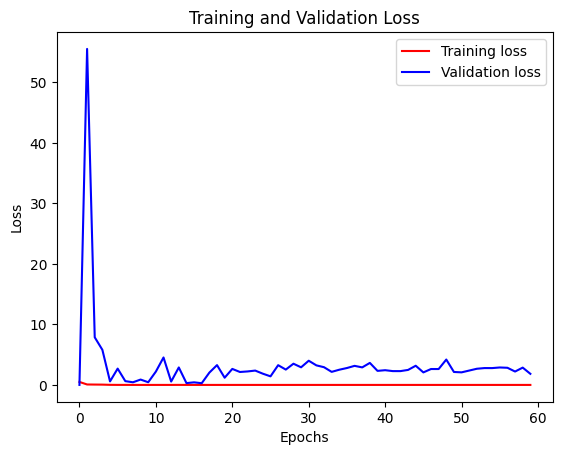

Fold9-2


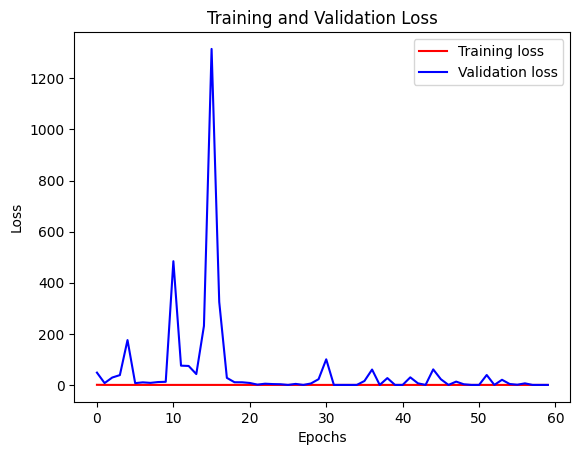

Fold9-3


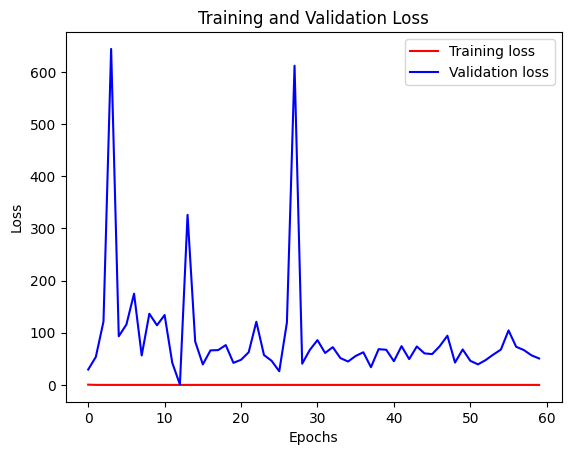

In [194]:
print("Fold9-1")
plt.plot(epochs9_1, train_loss9_1, 'r', label='Training loss')
plt.plot(epochs9_1, val_loss9_1, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold9-2")
plt.plot(epochs9_2, train_loss9_2, 'r', label='Training loss')
plt.plot(epochs9_2, val_loss9_2, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold9-3")
plt.plot(epochs9_3, train_loss9_3, 'r', label='Training loss')
plt.plot(epochs9_3, val_loss9_3, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Fold 10

## data

In [195]:
datafold10 = data[9]
datafold10

['S034/003 Angry',
 'S129/006 Angry',
 'S139/002 Contempt',
 'S160/006 Contempt',
 'S073/006 Disgust',
 'S105/008 Disgust',
 'S129/011 Disgust',
 'S034/005 Happy',
 'S053/004 Happy',
 'S063/002 Happy',
 'S083/003 Happy',
 'S093/004 Happy',
 'S115/008 Happy',
 'S129/012 Happy',
 'S093/001 Sad',
 'S115/004 Sad',
 'S034/001 Surprise',
 'S053/001 Surprise',
 'S063/001 Surprise',
 'S073/001 Surprise',
 'S115/001 Surprise',
 'S129/002 Surprise']

In [196]:
dest10 = "../log/lossfold10/"
losslist10 = []
for file in os.listdir(dest10):
    temp = []
    if file.startswith("cktrain_loss") and file.endswith(".txt"):
        losslist10.append(file)

losslist

In [197]:
losslist10

['cktrain_loss_fold10-1fan_ckplus_date_21-Feb-2024-07-25-40.txt',
 'cktrain_loss_fold10-2fan_ckplus_date_21-Feb-2024-11-48-52.txt',
 'cktrain_loss_fold10-3fan_ckplus_date_21-Feb-2024-13-43-33.txt']

In [198]:
evaldestfold10 = "../log/lossfold10/eval/"
evallist_fold10 = []
for file in os.listdir(evaldestfold10):
    evallist_fold10.append(file)

evallist

In [199]:
evallist_fold10

['10-1evalfan_ckplus_date_26-Feb-2024-05-26-46.txt',
 '10-2evalfan_ckplus_date_26-Feb-2024-05-27-47.txt',
 '10-3evalfan_ckplus_date_26-Feb-2024-05-28-53.txt']

## 10-1

In [200]:
evalfile10_1 = evallist_fold10[0]
evalfile10_1

'10-1evalfan_ckplus_date_26-Feb-2024-05-26-46.txt'

In [201]:
losslist10[0]

'cktrain_loss_fold10-1fan_ckplus_date_21-Feb-2024-07-25-40.txt'

In [202]:
fold_10_1 = losslist10[0]
epochs10_1 = []
train_loss10_1 = []
val_loss10_1 = []
with open(dest10 + fold_10_1, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs10_1.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss10_1.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss10_1.append(float(temp[0]))
print(epochs10_1)
print(train_loss10_1)
print(val_loss10_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4532, 0.1133, 0.0574, 0.0297, 0.0239, 0.0184, 0.0008, 0.0003, 0.0018, 0.0011, 0.0102, 0.0004, 0.0007, 0.003, 0.0009, 0.0004, 0.0003, 0.0002, 0.0058, 0.0008, 0.0003, 0.0002, 0.0002, 0.0003, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0002]
[0.9475, 5.0932, 4.4592, 50.1053, 8.6765, 12.1524, 8.7866, 9.2549, 10.3271, 6.778, 7.3896, 8.0137, 12.5509, 10.0055, 11.6776, 9.8127, 6.272, 5.7751, 4.2917, 5.6617, 7.0322, 6.8043, 7.1977, 5.8657, 5.2773, 4.6613, 4.6358, 5.4347, 6.3353, 6.1223, 5.0449, 6.3269, 5.0465, 5.3816, 5.914, 4.054

### prediction report

In [203]:
label_10_1, pred_10_1 = report_pred(evaldestfold10, evalfile10_1, datafold10, listvalue)

S034/003 Angry, Label: 1 (Angry), Pred: 4 (Sad), Correct: False


S129/002 Surprise, Label: 6 (Surprise), Pred: 5 (Contempt), Correct: False


### classification report

In [204]:
print("Fold10-1")
print(classification_report(label_10_1, pred_10_1))

Fold10-1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         3
           4       0.67      1.00      0.80         2
           5       0.67      1.00      0.80         2
           6       1.00      0.83      0.91         6

    accuracy                           0.91        22
   macro avg       0.89      0.89      0.86        22
weighted avg       0.94      0.91      0.91        22



## 10-2

In [205]:
evalfile10_2 = evallist_fold10[1]
evalfile10_2

'10-2evalfan_ckplus_date_26-Feb-2024-05-27-47.txt'

In [206]:
losslist10[1]

'cktrain_loss_fold10-2fan_ckplus_date_21-Feb-2024-11-48-52.txt'

In [207]:
fold_10_2 = losslist10[1]
epochs10_2 = []
train_loss10_2 = []
val_loss10_2 = []
with open(dest10 + fold_10_2, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs10_2.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss10_2.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss10_2.append(float(temp[0]))
print(epochs10_2)
print(train_loss10_2)
print(val_loss10_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4721, 0.1206, 0.0521, 0.0197, 0.0222, 0.0174, 0.0077, 0.0052, 0.0007, 0.0003, 0.0002, 0.0003, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
[1.5044, 5.5652, 18.894, 5.9208, 4.6544, 4.2576, 7.5985, 6.4915, 5.0994, 4.4361, 5.8604, 4.7767, 5.0591, 6.3242, 4.9862, 4.7446, 5.1305, 4.0461, 3.7063, 4.2429, 4.7487, 3.7021, 3.7012, 3.343, 3.7162, 3.5455, 3.599, 3.0966, 2.9682, 2.88, 2.8188, 2.9963, 2.7236, 3.3084, 3.0059, 3.0129, 3.1

### prediction report

In [208]:
label_10_2, pred_10_2 = report_pred(evaldestfold10, evalfile10_2, datafold10, listvalue)

S115/004 Sad, Label: 4 (Sad), Pred: 6 (Surprise), Correct: False


S129/002 Surprise, Label: 6 (Surprise), Pred: 5 (Contempt), Correct: False


### classification report

In [209]:
print("Fold10-2")
print(classification_report(label_10_2, pred_10_2))

Fold10-2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           4       1.00      0.50      0.67         2
           5       0.67      1.00      0.80         2
           6       0.83      0.83      0.83         6

    accuracy                           0.91        22
   macro avg       0.92      0.89      0.88        22
weighted avg       0.92      0.91      0.91        22



## 10-3

In [210]:
evalfile10_3 = evallist_fold10[2]
evalfile10_3

'10-3evalfan_ckplus_date_26-Feb-2024-05-28-53.txt'

In [211]:
losslist10[2]

'cktrain_loss_fold10-3fan_ckplus_date_21-Feb-2024-13-43-33.txt'

In [212]:
fold_10_3 = losslist10[2]
epochs10_3 = []
train_loss10_3 = []
val_loss10_3 = []
with open(dest10 + fold_10_3, "r") as f:
    for line in f:
        if re.match(r"E", line):
            temp = line.strip().split(":")
            epochs10_3.append(int(temp[1]))
        elif re.match(r"train", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            train_loss10_3.append(float(temp[1]))
        elif re.match(r"val", line):
            temp = line.strip().split(":")
            temp = temp[1].split(" ")
            val_loss10_3.append(float(temp[0]))
print(epochs10_3)
print(train_loss10_3)
print(val_loss10_3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.4492, 0.0759, 0.033, 0.0368, 0.0133, 0.0013, 0.004, 0.0336, 0.0151, 0.0031, 0.0005, 0.0007, 0.0037, 0.0006, 0.0025, 0.0007, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002, 0.0001, 0.0002, 0.0002, 0.0007, 0.0002, 0.0002, 0.0003, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0016, 0.0006, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001]
[2.5809, 61.4986, 121.5601, 52.3094, 141.6659, 111.8401, 69.6002, 206.3252, 52.9315, 181.8772, 147.7713, 236.6396, 445.6972, 207.5802, 168.4035, 109.9392, 122.1718, 115.2077, 132.08, 137.9594, 100.7587, 84.7917, 120.9211, 104.1027, 103.7322, 43.0479, 39.4541, 49.4321, 38.4666, 64.2999, 31.

### prediction report

In [213]:
label_10_3, pred_10_3 = report_pred(evaldestfold10, evalfile10_3, datafold10, listvalue)

S160/006 Contempt, Label: 5 (Contempt), Pred: 1 (Angry), Correct: False


S129/002 Surprise, Label: 6 (Surprise), Pred: 5 (Contempt), Correct: False


### classification report

In [214]:
print("Fold10-3")

Fold10-3


In [215]:
print(classification_report(label_10_3, pred_10_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       0.50      0.50      0.50         2
           6       1.00      0.83      0.91         6

    accuracy                           0.91        22
   macro avg       0.86      0.89      0.87        22
weighted avg       0.92      0.91      0.91        22



# loss

Fold10-1


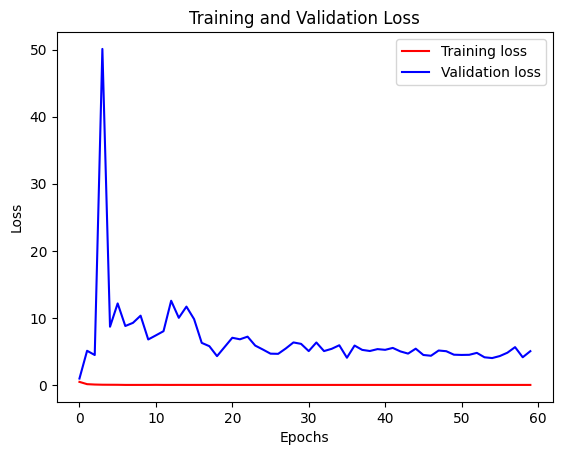

Fold10-2


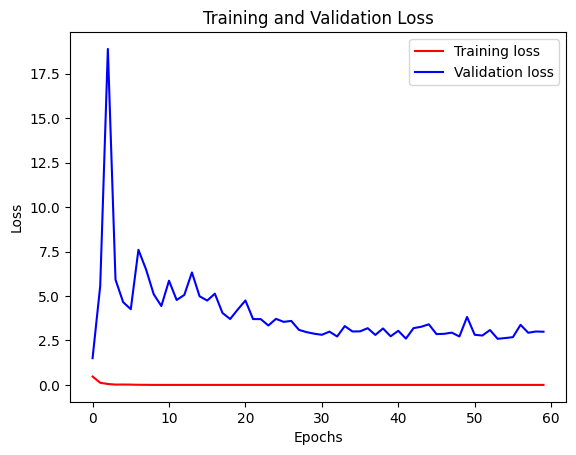

Fold10-3


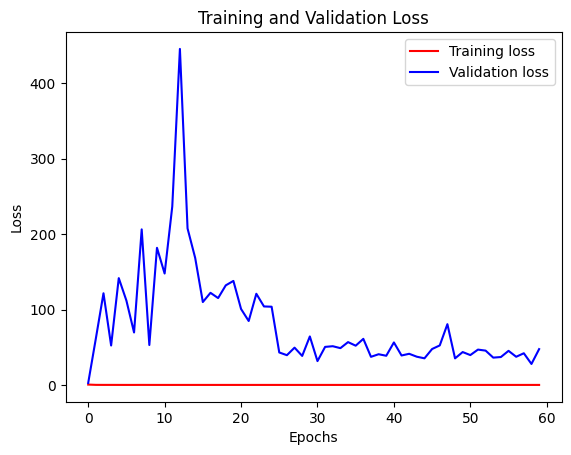

In [216]:
print("Fold10-1")
plt.plot(epochs10_1, train_loss10_1, 'r', label='Training loss')
plt.plot(epochs10_1, val_loss10_1, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold10-2")
plt.plot(epochs10_2, train_loss10_2, 'r', label='Training loss')
plt.plot(epochs10_2, val_loss10_2, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Fold10-3")
plt.plot(epochs10_3, train_loss10_3, 'r', label='Training loss')
plt.plot(epochs10_3, val_loss10_3, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()